In [8]:
import pandas as pd

In [9]:
df_lead = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/lead_data_new.csv")
df_note = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/notes_data.csv")
df_task = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/task_data.csv")

/var/folders/82/0mjwyp6n4ql3yr64dnns9_9r0000gp/T/ipykernel_14743/753234858.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_note = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/notes_data.csv")
/var/folders/82/0mjwyp6n4ql3yr64dnns9_9r0000gp/T/ipykernel_14743/753234858.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_task = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/task_data.csv")


In [10]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source
0,104361,2023-02-28T18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaN,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance
1,104374,2023-02-28T19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaN,unicreds,NaN,NaN,NaN,unicreds
2,104385,2023-02-28T19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaN,unicreds,NaN,NaN,NaN,unicreds
3,104386,2023-02-28T19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaN,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance
4,104456,2023-03-01T01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01T07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance


In [12]:
# Ensuring datetime conversion is correctly applied with infer_datetime_format=True
df_lead['lead_created_at'] = pd.to_datetime(df_lead['lead_created_at'], errors='coerce', infer_datetime_format=True)
# Applying the same for the other datetime column, with errors coerced to handle any non-convertible values
df_lead['first_status_except_created_or_contacted_date'] = pd.to_datetime(df_lead['first_status_except_created_or_contacted_date'], errors='coerce', infer_datetime_format=True)

# Extracting date parts into separate new columns after ensuring the datetime type
df_lead['created_at_date'] = df_lead['lead_created_at'].dt.date
df_lead['first_status_except_created_or_contacted_date_only'] = df_lead['first_status_except_created_or_contacted_date'].dt.date


/var/folders/82/0mjwyp6n4ql3yr64dnns9_9r0000gp/T/ipykernel_14743/1034757463.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_lead['lead_created_at'] = pd.to_datetime(df_lead['lead_created_at'], errors='coerce', infer_datetime_format=True)
/var/folders/82/0mjwyp6n4ql3yr64dnns9_9r0000gp/T/ipykernel_14743/1034757463.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_lead['first_status_except_created_or_contacted_date'] = pd.to_datetime(df_lead['first_status_except_created_or_contacted_date'], errors='coerce', infer_datetime_format=True)


In [13]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01


In [14]:
df_task.head()

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,completed_by_system,metadata,summary_hash
0,373015,call him when he gets offer,2023-03-10T05:58:00,1,0,2023-03-01T03:58:39.157706,2023-03-09T08:15:43.22904,6684,101428,0,0,{},NaN
1,373017,call,2023-03-02T04:22:00,1,0,2023-03-01T04:22:18.368404,2023-03-02T04:25:51.727119,6528,91427,0,0,{},NaN
2,373019,follow up,2023-03-01T13:24:00,1,0,2023-03-01T04:24:13.838951,2023-03-02T03:33:02.256045,131,100286,0,0,{},NaN
3,373020,resume and options,2023-03-01T11:24:00,1,0,2023-03-01T04:24:44.889307,2023-03-01T13:46:37.868276,131,100413,0,0,{},NaN
4,373021,follow up,2023-02-28T21:37:00,1,0,2023-03-01T04:25:09.070099,2023-03-01T13:23:20.758238,131,98596,0,0,{},NaN


In [15]:
import pandas as pd

# Convert 'created_at', 'updated_at', and 'remind_at' to datetime, accommodating mixed formats
df_task['created_at'] = pd.to_datetime(df_task['created_at'], errors='coerce')
df_task['updated_at'] = pd.to_datetime(df_task['updated_at'], errors='coerce')
df_task['remind_at'] = pd.to_datetime(df_task['remind_at'], errors='coerce')

# Extracting date parts into separate columns
df_task['created_at_date'] = df_task['created_at'].dt.date
df_task['updated_at_date'] = df_task['updated_at'].dt.date
df_task['remind_at_date'] = df_task['remind_at'].dt.date

In [16]:
df_task.head()

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,completed_by_system,metadata,summary_hash,created_at_date,updated_at_date,remind_at_date
0,373015,call him when he gets offer,2023-03-10 05:58:00,1,0,2023-03-01 03:58:39.157706,2023-03-09 08:15:43.229040,6684,101428,0,0,{},NaN,2023-03-01,2023-03-09,2023-03-10
1,373017,call,2023-03-02 04:22:00,1,0,2023-03-01 04:22:18.368404,2023-03-02 04:25:51.727119,6528,91427,0,0,{},NaN,2023-03-01,2023-03-02,2023-03-02
2,373019,follow up,2023-03-01 13:24:00,1,0,2023-03-01 04:24:13.838951,2023-03-02 03:33:02.256045,131,100286,0,0,{},NaN,2023-03-01,2023-03-02,2023-03-01
3,373020,resume and options,2023-03-01 11:24:00,1,0,2023-03-01 04:24:44.889307,2023-03-01 13:46:37.868276,131,100413,0,0,{},NaN,2023-03-01,2023-03-01,2023-03-01
4,373021,follow up,2023-02-28 21:37:00,1,0,2023-03-01 04:25:09.070099,2023-03-01 13:23:20.758238,131,98596,0,0,{},NaN,2023-03-01,2023-03-01,2023-02-28


In [17]:
df_note.head()

,id,note,is_deleted,created_by_id,created_at,lead_id,updated_at,is_system_generated,remind_at,format
0,452566,Spoke to her regarding Seattle university,0,6684.0,2023-03-01T03:57:10.858335,102795,2023-03-01T03:57:10.858375,0,NaN,TEXT
1,452567,already applied now waiting for offers,0,6684.0,2023-03-01T03:58:15.586156,101428,2023-03-01T03:58:15.586201,0,NaN,TEXT
2,452572,request for call after 3,0,6528.0,2023-03-01T04:25:03.567378,98927,2023-03-01T04:25:03.567419,0,NaN,TEXT
3,452580,"whatsapp na, student was busy, but informed ab...",0,6335.0,2023-03-01T04:55:08.58465,96720,2023-03-01T04:55:08.584691,0,NaN,TEXT
4,452581,MSdata anyltics.. bachelors on math honours 8....,0,6684.0,2023-03-01T04:56:45.671086,95742,2023-03-01T04:56:45.67113,0,NaN,TEXT


In [18]:
import pandas as pd

# Assuming df_note is your DataFrame
# Convert 'created_at' and 'updated_at' to datetime, accommodating mixed formats
df_note['created_at'] = pd.to_datetime(df_note['created_at'], errors='coerce')
df_note['updated_at'] = pd.to_datetime(df_note['updated_at'], errors='coerce')

# Since 'remind_at' might contain NaN values and you want to convert it to datetime,
# make sure to handle NaN values properly by using errors='coerce'
df_note['remind_at'] = pd.to_datetime(df_note['remind_at'], errors='coerce')

# Extracting date parts into separate columns
df_note['created_at_date'] = df_note['created_at'].dt.date
df_note['updated_at_date'] = df_note['updated_at'].dt.date
# For 'remind_at_date', since 'remind_at' may contain NaT values, the resulting date part can also be NaT
df_note['remind_at_date'] = df_note['remind_at'].dt.date if df_note['remind_at'].notna().any() else pd.NaT

In [19]:
df_note.head()

,id,note,is_deleted,created_by_id,created_at,lead_id,updated_at,is_system_generated,remind_at,format,created_at_date,updated_at_date,remind_at_date
0,452566,Spoke to her regarding Seattle university,0,6684.0,2023-03-01 03:57:10.858335,102795,2023-03-01 03:57:10.858375,0,NaT,TEXT,2023-03-01,2023-03-01,NaT
1,452567,already applied now waiting for offers,0,6684.0,2023-03-01 03:58:15.586156,101428,2023-03-01 03:58:15.586201,0,NaT,TEXT,2023-03-01,2023-03-01,NaT
2,452572,request for call after 3,0,6528.0,2023-03-01 04:25:03.567378,98927,2023-03-01 04:25:03.567419,0,NaT,TEXT,2023-03-01,2023-03-01,NaT
3,452580,"whatsapp na, student was busy, but informed ab...",0,6335.0,2023-03-01 04:55:08.584650,96720,2023-03-01 04:55:08.584691,0,NaT,TEXT,2023-03-01,2023-03-01,NaT
4,452581,MSdata anyltics.. bachelors on math honours 8....,0,6684.0,2023-03-01 04:56:45.671086,95742,2023-03-01 04:56:45.671130,0,NaT,TEXT,2023-03-01,2023-03-01,NaT


In [20]:
# First, ensure both columns are in datetime format (this step might already be done)
df_lead['created_at_date'] = pd.to_datetime(df_lead['created_at_date'])
df_lead['first_status_except_created_or_contacted_date_only'] = pd.to_datetime(df_lead['first_status_except_created_or_contacted_date_only'])

# Then calculate the difference in days directly
df_lead['time_diff_in_days'] = (df_lead['first_status_except_created_or_contacted_date_only'] - df_lead['created_at_date']).dt.days


In [21]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0


In [22]:
df_lead['utm_source_medium']  = df_lead['utm_source']  + '-' +  df_lead['utm_medium']

In [23]:
df_lead

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0,google-cpc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149494,181261,2023-07-21 12:22:45.586146,DEPOSIT,Sharmishtha Chikhalkar,Mumbai - HO,QUALIFIED,2023-07-21 14:34:53.590722,google,2023-07-21T20:04:53.590722,src-generic-degree-masters-tg-uk-geo-mumbai,cpc,get-expert-assistance,2023-07-21,2023-07-21,0.0,google-cpc
149495,380522,2024-03-17 03:55:34.148745,CONTACTED,Hardik Kamdar,Mumbai - HO,NaN,NaT,google,NaN,dsp-remarketing-tg-all-geo-in,cpc,get-expert-guidance,2024-03-17,NaT,NaN,google-cpc
149496,380423,2024-03-16 19:20:31.595955,LOST,Hardik Kamdar,Hyderabad,LOST,2024-03-20 10:40:57.331616,google,NaN,src-generic-core-tg-uk-geo-hyderabad-wan,cpc,get-expert-support-hyderabad,2024-03-16,2024-03-20,4.0,google-cpc
149497,379556,2024-03-15 09:12:43.098012,CONTACTED,Sara Solkar,Hyderabad,NaN,NaT,google,NaN,src-competitors-geo-tg-all-geo-in,cpc,get-expert-guidance,2024-03-15,NaT,NaN,google-cpc


In [24]:
import pandas as pd

merged_df = pd.merge(df_note, df_lead[['lead_id', 'created_at_date', 'first_status_except_created_or_contacted_date_only']], on='lead_id', suffixes=('_note', '_lead'))

# Filter for notes created between 'created_at_date_lead' and 'first_status_except_created_or_contacted_date_only'
filtered_notes = merged_df[(merged_df['created_at_date_note'] >= merged_df['created_at_date_lead']) & 
                           (merged_df['created_at_date_note'] <= merged_df['first_status_except_created_or_contacted_date_only'])]

# Count the notes per lead_id within the specified range
notes_count_per_lead = filtered_notes.groupby('lead_id').size().reset_index(name='notes_count')

# Merge the counts back into df_lead, using a left join to keep all rows in df_lead
df_lead = pd.merge(df_lead, notes_count_per_lead, on='lead_id', how='left')

# Fill NaN values in 'notes_count' with 0, as these leads have no notes in the specified range
df_lead['notes_count'].fillna(0, inplace=True)

# Convert 'notes_count' to an integer, as counts should be whole numbers
df_lead['notes_count'] = df_lead['notes_count'].astype(int)

In [26]:
df_lead.head(5)

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium,notes_count
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0,google-cpc,1


In [27]:
import pandas as pd

# Merge df_task with df_lead on 'lead_id', incorporating suffixes for overlapping columns
merged_df = pd.merge(df_task, df_lead[['lead_id', 'created_at_date', 'first_status_except_created_or_contacted_date_only']], on='lead_id', suffixes=('_task', '_lead'))

# Filter tasks where 'created_at_date_task' is within the lead's date range
filtered_tasks = merged_df[
    (merged_df['created_at_date_task'] >= merged_df['created_at_date_lead']) & 
    (merged_df['created_at_date_task'] <= merged_df['first_status_except_created_or_contacted_date_only'])
]

# Count the filtered tasks for each lead_id
task_counts = filtered_tasks.groupby('lead_id').size().reset_index(name='total_tasks')

# Merge the counts back into df_lead
df_lead = pd.merge(df_lead, task_counts, on='lead_id', how='left')

# Fill NaN values with 0 in 'total_tasks' to account for leads without tasks in the specified range
df_lead['total_tasks'].fillna(0, inplace=True)

# Ensure 'total_tasks' is an integer
df_lead['total_tasks'] = df_lead['total_tasks'].astype(int)


In [31]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium,notes_count,total_tasks
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0,google-cpc,1,0


In [32]:
filtered_tasks = filtered_tasks.copy()

filtered_tasks['remind_at'] = pd.to_datetime(filtered_tasks['remind_at'], errors='coerce')
filtered_tasks['updated_at'] = pd.to_datetime(filtered_tasks['updated_at'], errors='coerce')

# Adding 4 hours to 'remind_at' and checking if it's before 'updated_at' for incomplete tasks
filtered_tasks['task_violations'] = (
    (filtered_tasks['remind_at'] + pd.Timedelta(hours=4)) < filtered_tasks['updated_at']
).astype(int)


In [33]:
filtered_tasks.head()

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,completed_by_system,metadata,summary_hash,created_at_date_task,updated_at_date,remind_at_date,created_at_date_lead,first_status_except_created_or_contacted_date_only,task_violations
4,373927,Doc follow up #1,2023-03-02 05:01:00,1,0,2023-03-01 10:24:32.679053,2023-03-02 05:43:10.103253,4777,104488,0,0,{},NaN,2023-03-01,2023-03-02,2023-03-02,2023-03-01,2023-03-01,0
30,373972,Check If Seleceted The Programme,2023-03-06 10:35:00,1,0,2023-03-01 10:35:48.142399,2023-03-06 11:28:01.289697,1790,104596,0,0,{},NaN,2023-03-01,2023-03-06,2023-03-06,2023-03-01,2023-03-01,0
50,374037,Passport Appt check,2023-03-22 10:51:00,1,0,2023-03-01 10:51:33.302499,2023-03-21 11:08:36.562701,4777,104582,0,0,{},NaN,2023-03-01,2023-03-21,2023-03-22,2023-03-01,2023-03-01,0
54,374133,Follow up #2,2023-03-07 09:19:00,1,0,2023-03-01 11:19:37.053353,2023-03-08 05:42:25.712415,4777,104595,0,0,{},NaN,2023-03-01,2023-03-08,2023-03-07,2023-03-01,2023-03-11,1
55,382278,Follow up #3,2023-03-11 11:51:00,1,0,2023-03-08 05:42:47.648711,2023-03-11 09:47:34.072505,4777,104595,0,0,{},NaN,2023-03-08,2023-03-11,2023-03-11,2023-03-01,2023-03-11,0


In [34]:
# Filter to include only tasks with task_violations equal to 1
violated_tasks = filtered_tasks[filtered_tasks['task_violations'] == 1]

# Group by lead_id and count the violations
violated_task_counts = violated_tasks.groupby('lead_id').size().reset_index(name='tasks_violated')

# Merge the violation counts back into df_lead
df_lead = pd.merge(df_lead, violated_task_counts, on='lead_id', how='left')

# Fill NaN values with 0 in 'task_violated' to account for leads without task violations
df_lead['tasks_violated'].fillna(0, inplace=True)

# Ensure 'task_violated' is an integer
df_lead['tasks_violated'] = df_lead['tasks_violated'].astype(int)

In [35]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium,notes_count,total_tasks,tasks_violated
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0,0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0,0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0,0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0,0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0,google-cpc,1,0,0


In [36]:
filtered_tasks.head()

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,completed_by_system,metadata,summary_hash,created_at_date_task,updated_at_date,remind_at_date,created_at_date_lead,first_status_except_created_or_contacted_date_only,task_violations
4,373927,Doc follow up #1,2023-03-02 05:01:00,1,0,2023-03-01 10:24:32.679053,2023-03-02 05:43:10.103253,4777,104488,0,0,{},NaN,2023-03-01,2023-03-02,2023-03-02,2023-03-01,2023-03-01,0
30,373972,Check If Seleceted The Programme,2023-03-06 10:35:00,1,0,2023-03-01 10:35:48.142399,2023-03-06 11:28:01.289697,1790,104596,0,0,{},NaN,2023-03-01,2023-03-06,2023-03-06,2023-03-01,2023-03-01,0
50,374037,Passport Appt check,2023-03-22 10:51:00,1,0,2023-03-01 10:51:33.302499,2023-03-21 11:08:36.562701,4777,104582,0,0,{},NaN,2023-03-01,2023-03-21,2023-03-22,2023-03-01,2023-03-01,0
54,374133,Follow up #2,2023-03-07 09:19:00,1,0,2023-03-01 11:19:37.053353,2023-03-08 05:42:25.712415,4777,104595,0,0,{},NaN,2023-03-01,2023-03-08,2023-03-07,2023-03-01,2023-03-11,1
55,382278,Follow up #3,2023-03-11 11:51:00,1,0,2023-03-08 05:42:47.648711,2023-03-11 09:47:34.072505,4777,104595,0,0,{},NaN,2023-03-08,2023-03-11,2023-03-11,2023-03-01,2023-03-11,0


In [37]:
filtered_tasks.sort_values(by=['lead_id', 'created_at_date_task'], inplace=True)

# Calculate the time difference in days between the 'updated_at_date' of one task and 'created_at_date_task' of the next task
filtered_tasks['next_task_created_at_date'] = filtered_tasks.groupby('lead_id')['created_at_date_task'].shift(-1)
filtered_tasks['free_time_days'] = (pd.to_datetime(filtered_tasks['next_task_created_at_date']) - pd.to_datetime(filtered_tasks['updated_at_date'])).dt.days


In [38]:
filtered_tasks.head()

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,...,metadata,summary_hash,created_at_date_task,updated_at_date,remind_at_date,created_at_date_lead,first_status_except_created_or_contacted_date_only,task_violations,next_task_created_at_date,free_time_days
16822,375939,2,2023-03-04 12:57:00,1,0,2023-03-02 10:57:40.447653,2023-03-06 09:36:10.766999,1788,104440,0,...,{},NaN,2023-03-02,2023-03-06,2023-03-04,2023-03-01,2023-03-09,1,2023-03-06,0.0
16823,380027,3,2023-03-09 12:36:00,1,0,2023-03-06 09:36:49.065982,2023-03-09 15:14:25.139309,1788,104440,0,...,{},NaN,2023-03-06,2023-03-09,2023-03-09,2023-03-01,2023-03-09,0,NaN,NaN
3024,373303,Follow up #2,2023-03-08 12:18:00,1,0,2023-03-01 07:18:56.368677,2023-03-08 09:22:08.627676,4777,104441,0,...,{},NaN,2023-03-01,2023-03-08,2023-03-08,2023-03-01,2023-03-13,0,2023-03-08,0.0
3025,382721,Follow up #3,2023-03-13 10:22:00,1,0,2023-03-08 09:22:43.154434,2023-03-13 09:38:07.522406,4777,104441,0,...,{},NaN,2023-03-08,2023-03-13,2023-03-13,2023-03-01,2023-03-13,0,NaN,NaN
674,375947,2,2023-03-04 12:58:00,1,0,2023-03-02 10:59:23.466816,2023-03-06 09:38:25.453014,1788,104443,0,...,{},NaN,2023-03-02,2023-03-06,2023-03-04,2023-03-01,2023-03-08,1,2023-03-06,0.0


In [39]:
# Filter out tasks with positive free time
positive_free_time = filtered_tasks[filtered_tasks['free_time_days'] > 0]

# Aggregate data for tasks with positive free time only
aggregated_positive_free_time = positive_free_time.groupby('lead_id')['free_time_days'].agg(
    count='count',
    median='median',
    sum='sum'
).reset_index()

aggregated_positive_free_time.rename(columns={
    'count': 'free_time_tasks_count',
    'median': 'free_time_median_days_count',
    'sum': 'free_time_sum_days_count'
}, inplace=True)

In [40]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,utm_medium,source,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium,notes_count,total_tasks,tasks_violated
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0,0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0,0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,NaN,unicreds,2023-02-28,NaT,NaN,NaN,0,0,0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,cpc,get-expert-assistance,2023-02-28,NaT,NaN,google-cpc,0,0,0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,cpc,get-expert-assistance,2023-03-01,2023-03-01,0.0,google-cpc,1,0,0


In [41]:
# Merge aggregated positive free time data back with df_lead
df_lead = pd.merge(df_lead, aggregated_positive_free_time, on='lead_id', how='left')

In [42]:

# Correct column names based on actual aggregated data
df_lead['free_time_tasks_count'].fillna(0, inplace=True)
df_lead['free_time_median_days_count'].fillna(0, inplace=True)
df_lead['free_time_sum_days_count'].fillna(0, inplace=True)


In [43]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,utm_source_medium,notes_count,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,2023-02-28,NaT,NaN,google-cpc,0,0,0,0.0,0.0,0.0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,2023-02-28,NaT,NaN,NaN,0,0,0,0.0,0.0,0.0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,2023-02-28,NaT,NaN,NaN,0,0,0,0.0,0.0,0.0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,2023-02-28,NaT,NaN,google-cpc,0,0,0,0.0,0.0,0.0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,2023-03-01,2023-03-01,0.0,google-cpc,1,0,0,0.0,0.0,0.0


In [44]:
# df_lead.to_csv("final_report.csv", index=True)

In [45]:
import pandas as pd
import numpy as np

# Assuming df_lead is your DataFrame

# Avoid division by zero by ensuring the denominator is at least 1
df_lead['notes_to_time_diff_in_days_percentage'] = (df_lead['notes_count'] / np.where(df_lead['time_diff_in_days'] == 0, 1, df_lead['time_diff_in_days'])) * 100


# Corrected condition for notes_violation
df_lead['notes_violation'] = np.where((df_lead['notes_to_time_diff_in_days_percentage'] > 0) & 
                                      (df_lead['notes_to_time_diff_in_days_percentage'] < 50), 1, 0)



In [46]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,time_diff_in_days,utm_source_medium,notes_count,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,NaN,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,NaN,0,0,0,0.0,0.0,0.0,NaN,0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,NaN,0,0,0,0.0,0.0,0.0,NaN,0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,NaN,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0.0,google-cpc,1,0,0,0.0,0.0,0.0,100.0,0


In [47]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate tasks violation percentage
df_lead['tasks_violation_percentage'] = df_lead.apply(
    lambda row: (row['tasks_violated'] / row['total_tasks'] * 100) if row['total_tasks'] > 0 else 0,
    axis=1
)



In [48]:
df_lead

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,utm_source_medium,notes_count,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0,0.0
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,0,0,0,0.0,0.0,0.0,NaN,0,0.0
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,0,0,0,0.0,0.0,0.0,NaN,0,0.0
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0,0.0
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,google-cpc,1,0,0,0.0,0.0,0.0,100.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149494,181261,2023-07-21 12:22:45.586146,DEPOSIT,Sharmishtha Chikhalkar,Mumbai - HO,QUALIFIED,2023-07-21 14:34:53.590722,google,2023-07-21T20:04:53.590722,src-generic-degree-masters-tg-uk-geo-mumbai,...,google-cpc,2,1,0,0.0,0.0,0.0,200.0,0,0.0
149495,380522,2024-03-17 03:55:34.148745,CONTACTED,Hardik Kamdar,Mumbai - HO,NaN,NaT,google,NaN,dsp-remarketing-tg-all-geo-in,...,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0,0.0
149496,380423,2024-03-16 19:20:31.595955,LOST,Hardik Kamdar,Hyderabad,LOST,2024-03-20 10:40:57.331616,google,NaN,src-generic-core-tg-uk-geo-hyderabad-wan,...,google-cpc,0,0,0,0.0,0.0,0.0,0.0,0,0.0
149497,379556,2024-03-15 09:12:43.098012,CONTACTED,Sara Solkar,Hyderabad,NaN,NaT,google,NaN,src-competitors-geo-tg-all-geo-in,...,google-cpc,0,0,0,0.0,0.0,0.0,NaN,0,0.0


In [49]:
import numpy as np

# Add the 'is_qualified' column based on the condition
df_lead['is_qualified'] = np.where(df_lead['qualified_date'].notnull(), 1, 0)

# Add "is_lost" column
df_lead['is_lost'] = np.where(df_lead['cur_status'] == 'LOST', 1, 0)

In [571]:
df_qualified = df_lead[df_lead['is_qualified'] == 1]

In [577]:
df_lead.to_csv("final_report_metrics.csv", index=True)

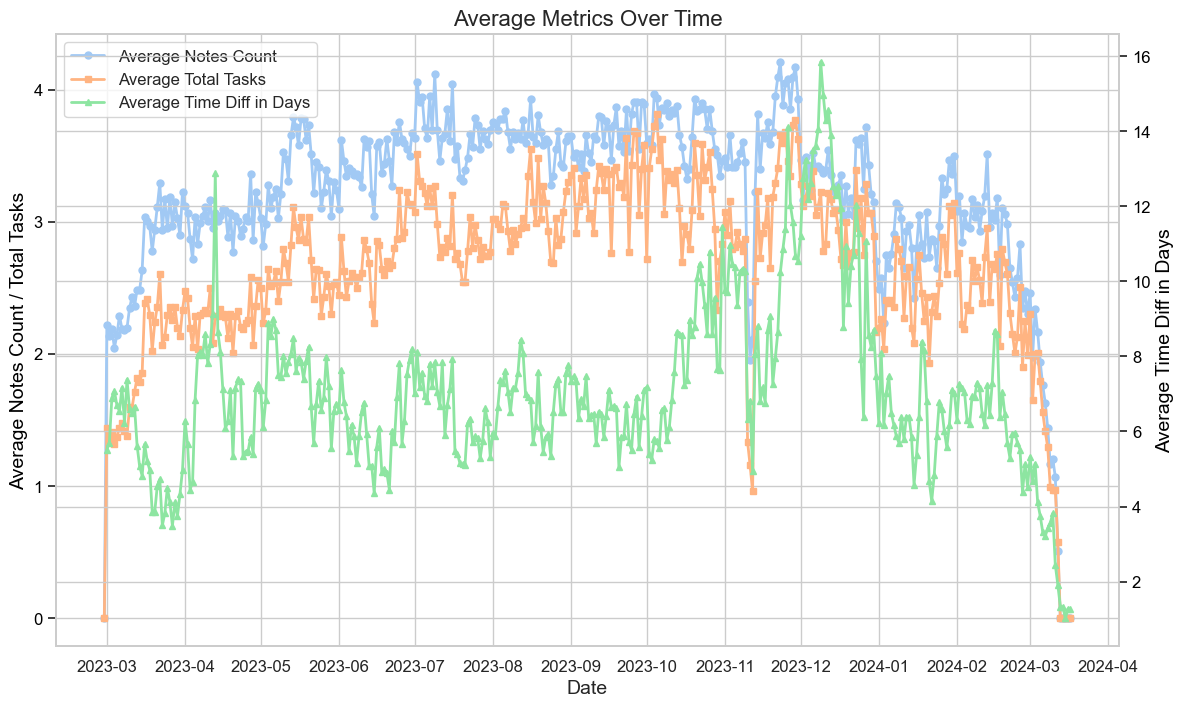

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_lead is already defined as per your structure
# Ensure that all relevant columns are in the correct data type
df_lead['created_at_date'] = pd.to_datetime(df_lead['created_at_date'])
df_lead['time_diff_in_days'] = pd.to_numeric(df_lead['time_diff_in_days'], errors='coerce')
df_lead['notes_count'] = pd.to_numeric(df_lead['notes_count'], errors='coerce')
df_lead['total_tasks'] = pd.to_numeric(df_lead['total_tasks'], errors='coerce')

# Aggregate data by day and calculate the mean of the specified columns
daily_avg = df_lead.groupby(df_lead['created_at_date'].dt.date)[['time_diff_in_days', 'notes_count', 'total_tasks']].mean()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_lead and daily_avg are already defined and prepared

# Enhancing aesthetics with seaborn
import seaborn as sns
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# Setting the color palette
colors = sns.color_palette("pastel")

# Plotting 'notes_count' and 'total_tasks' with improved aesthetics
ax1.plot(daily_avg.index, daily_avg['notes_count'], label='Average Notes Count', color=colors[0], marker='o', linestyle='-', linewidth=2, markersize=5)
ax1.plot(daily_avg.index, daily_avg['total_tasks'], label='Average Total Tasks', color=colors[1], marker='s', linestyle='-', linewidth=2, markersize=5)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Average Notes Count / Total Tasks', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Adjusting x-axis to display only months
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Create a twin axis for 'time_diff_in_days' with improved aesthetics
ax2 = ax1.twinx()
ax2.plot(daily_avg.index, daily_avg['time_diff_in_days'], label='Average Time Diff in Days', color=colors[2], marker='^', linestyle='-', linewidth=2, markersize=5)
ax2.set_ylabel('Average Time Diff in Days', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Rotate date labels for readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better aesthetics

# Adding a title
plt.title('Average Metrics Over Time', fontsize=16)

plt.show()


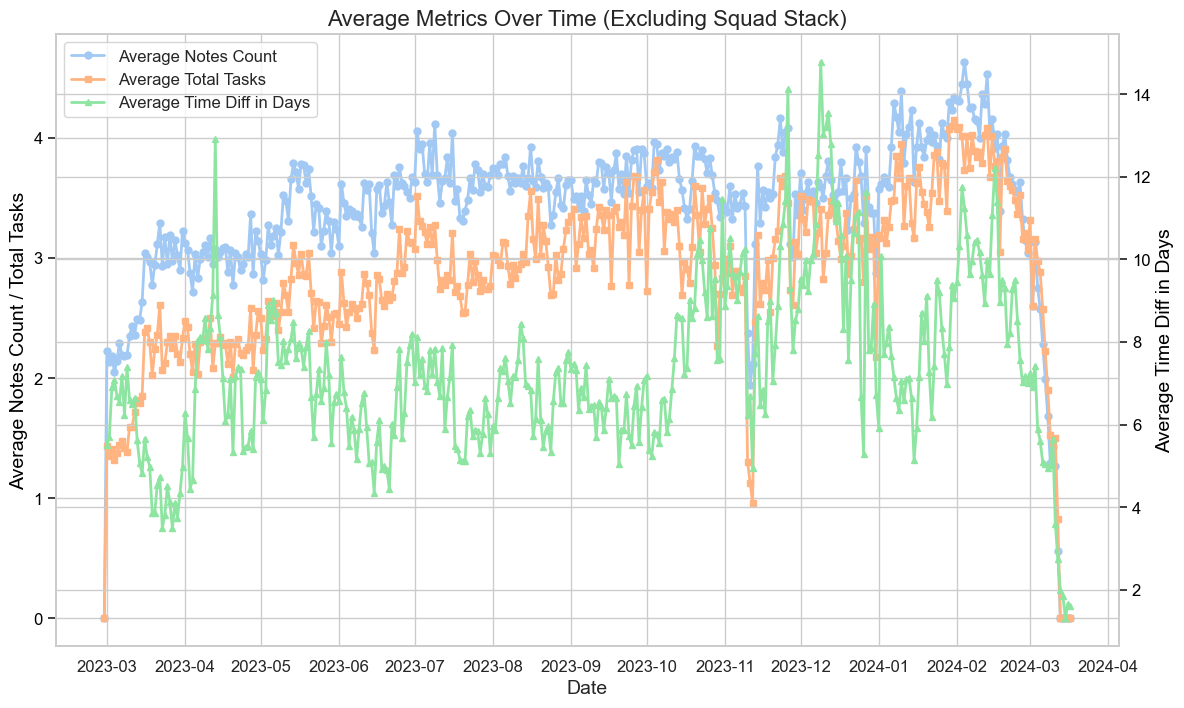

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming df_lead is already defined and preprocessed

# Filter out rows where lqt_agent is 'Squad Stack'
df_lead_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Ensure that all relevant columns are in the correct data type
df_lead_filtered['created_at_date'] = pd.to_datetime(df_lead_filtered['created_at_date'])
df_lead_filtered['time_diff_in_days'] = pd.to_numeric(df_lead_filtered['time_diff_in_days'], errors='coerce')
df_lead_filtered['notes_count'] = pd.to_numeric(df_lead_filtered['notes_count'], errors='coerce')
df_lead_filtered['total_tasks'] = pd.to_numeric(df_lead_filtered['total_tasks'], errors='coerce')

# Aggregate data by day and calculate the mean of the specified columns
daily_avg_filtered = df_lead_filtered.groupby(df_lead_filtered['created_at_date'].dt.date)[['time_diff_in_days', 'notes_count', 'total_tasks']].mean()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# Setting the color palette
colors = sns.color_palette("pastel")

# Plotting 'notes_count' and 'total_tasks' with improved aesthetics
ax1.plot(daily_avg_filtered.index, daily_avg_filtered['notes_count'], label='Average Notes Count', color=colors[0], marker='o', linestyle='-', linewidth=2, markersize=5)
ax1.plot(daily_avg_filtered.index, daily_avg_filtered['total_tasks'], label='Average Total Tasks', color=colors[1], marker='s', linestyle='-', linewidth=2, markersize=5)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Average Notes Count / Total Tasks', color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Adjusting x-axis to display only months
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Create a twin axis for 'time_diff_in_days' with improved aesthetics
ax2 = ax1.twinx()
ax2.plot(daily_avg_filtered.index, daily_avg_filtered['time_diff_in_days'], label='Average Time Diff in Days', color=colors[2], marker='^', linestyle='-', linewidth=2, markersize=5)
ax2.set_ylabel('Average Time Diff in Days', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black', labelsize=12)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Rotate date labels for readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better aesthetics

# Adding a title
plt.title('Average Metrics Over Time (Excluding Squad Stack)', fontsize=16)

plt.show()


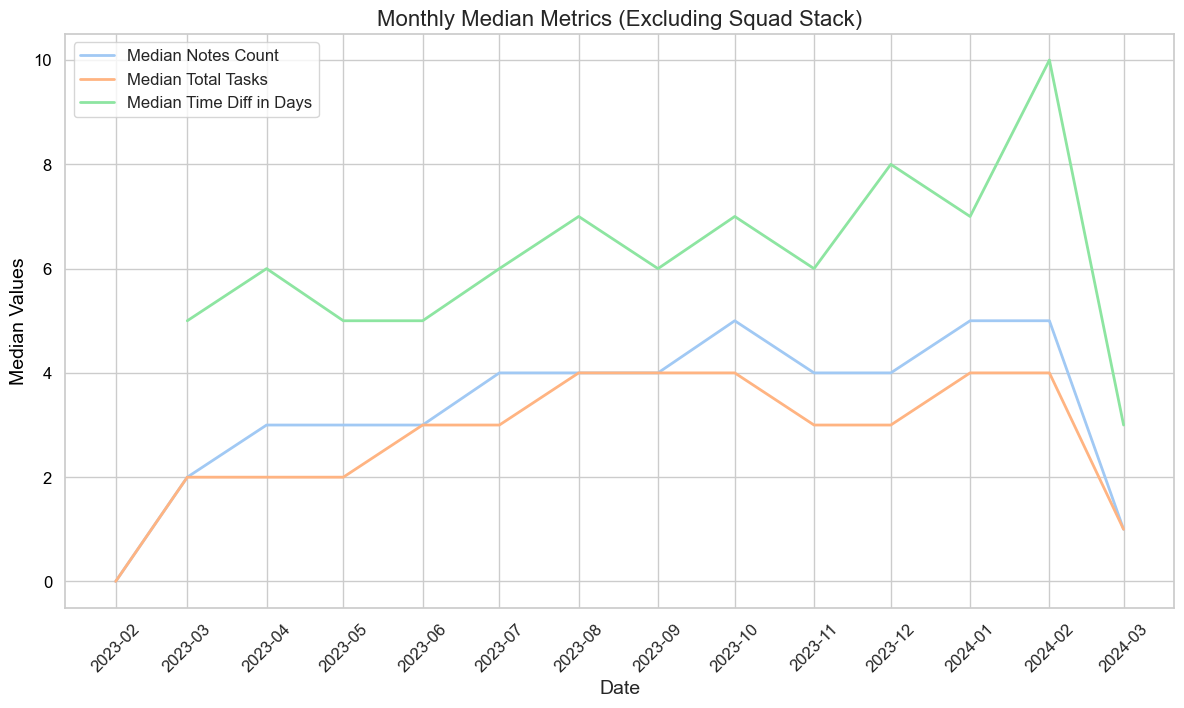

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming df_lead is already defined and preprocessed

# Filter out rows where lqt_agent is 'Squad Stack'
df_lead_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Ensure that all relevant columns are in the correct data type
df_lead_filtered['created_at_date'] = pd.to_datetime(df_lead_filtered['created_at_date'])
df_lead_filtered['time_diff_in_days'] = pd.to_numeric(df_lead_filtered['time_diff_in_days'], errors='coerce')
df_lead_filtered['notes_count'] = pd.to_numeric(df_lead_filtered['notes_count'], errors='coerce')
df_lead_filtered['total_tasks'] = pd.to_numeric(df_lead_filtered['total_tasks'], errors='coerce')

# Aggregate data by month and calculate the median of the specified columns
monthly_median_filtered = df_lead_filtered.groupby(df_lead_filtered['created_at_date'].dt.to_period('M'))[['time_diff_in_days', 'notes_count', 'total_tasks']].median().to_timestamp()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Setting the color palette
colors = sns.color_palette("pastel")

# Plotting all metrics on the same axis for monthly data
ax.plot(monthly_median_filtered.index, monthly_median_filtered['notes_count'], label='Median Notes Count', color=colors[0], linestyle='-', linewidth=2)
ax.plot(monthly_median_filtered.index, monthly_median_filtered['total_tasks'], label='Median Total Tasks', color=colors[1], linestyle='-', linewidth=2)
ax.plot(monthly_median_filtered.index, monthly_median_filtered['time_diff_in_days'], label='Median Time Diff in Days', color=colors[2], linestyle='-', linewidth=2)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Median Values', color='black', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Adjusting x-axis to display only months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adding legend
ax.legend(loc='upper left', fontsize=12)

# Rotate date labels for readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better aesthetics

# Adding a title
plt.title('Monthly Median Metrics (Excluding Squad Stack)', fontsize=16)

plt.show()


In [87]:
monthly_median_filtered

,time_diff_in_days,notes_count,total_tasks
created_at_date,,,
2023-02-01,NaN,0.0,0.0
2023-03-01,5.0,2.0,2.0
2023-04-01,6.0,3.0,2.0
2023-05-01,5.0,3.0,2.0
2023-06-01,5.0,3.0,3.0
2023-07-01,6.0,4.0,3.0
2023-08-01,7.0,4.0,4.0
2023-09-01,6.0,4.0,4.0
2023-10-01,7.0,5.0,4.0


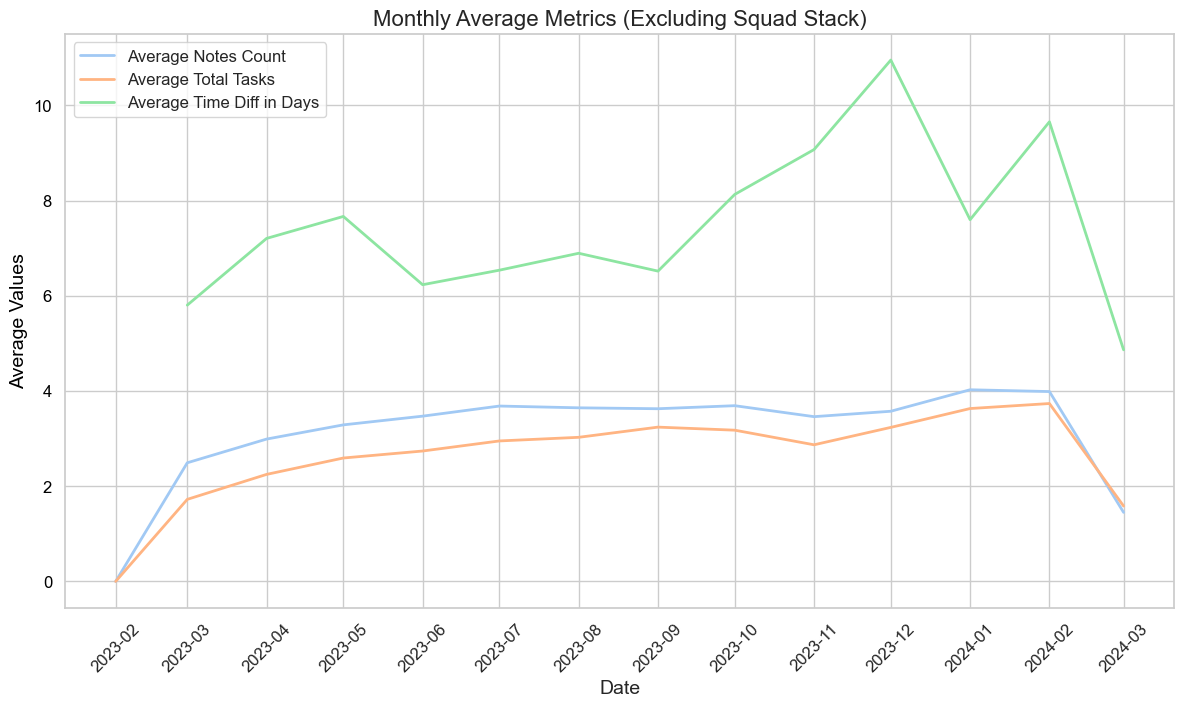

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming df_lead is already defined and preprocessed

# Filter out rows where lqt_agent is 'Squad Stack'
df_lead_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Ensure that all relevant columns are in the correct data type
df_lead_filtered['created_at_date'] = pd.to_datetime(df_lead_filtered['created_at_date'])
df_lead_filtered['time_diff_in_days'] = pd.to_numeric(df_lead_filtered['time_diff_in_days'], errors='coerce')
df_lead_filtered['notes_count'] = pd.to_numeric(df_lead_filtered['notes_count'], errors='coerce')
df_lead_filtered['total_tasks'] = pd.to_numeric(df_lead_filtered['total_tasks'], errors='coerce')

# Aggregate data by month and calculate the mean of the specified columns
monthly_avg_filtered = df_lead_filtered.groupby(df_lead_filtered['created_at_date'].dt.to_period('M'))[['time_diff_in_days', 'notes_count', 'total_tasks']].mean().to_timestamp()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Setting the color palette
colors = sns.color_palette("pastel")

# Plotting all metrics on the same axis for monthly data
ax.plot(monthly_avg_filtered.index, monthly_avg_filtered['notes_count'], label='Average Notes Count', color=colors[0], linestyle='-', linewidth=2)
ax.plot(monthly_avg_filtered.index, monthly_avg_filtered['total_tasks'], label='Average Total Tasks', color=colors[1], linestyle='-', linewidth=2)
ax.plot(monthly_avg_filtered.index, monthly_avg_filtered['time_diff_in_days'], label='Average Time Diff in Days', color=colors[2], linestyle='-', linewidth=2)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Values', color='black', fontsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Adjusting x-axis to display only months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adding legend
ax.legend(loc='upper left', fontsize=12)

# Rotate date labels for readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better aesthetics

# Adding a title
plt.title('Monthly Average Metrics (Excluding Squad Stack)', fontsize=16)

plt.show()


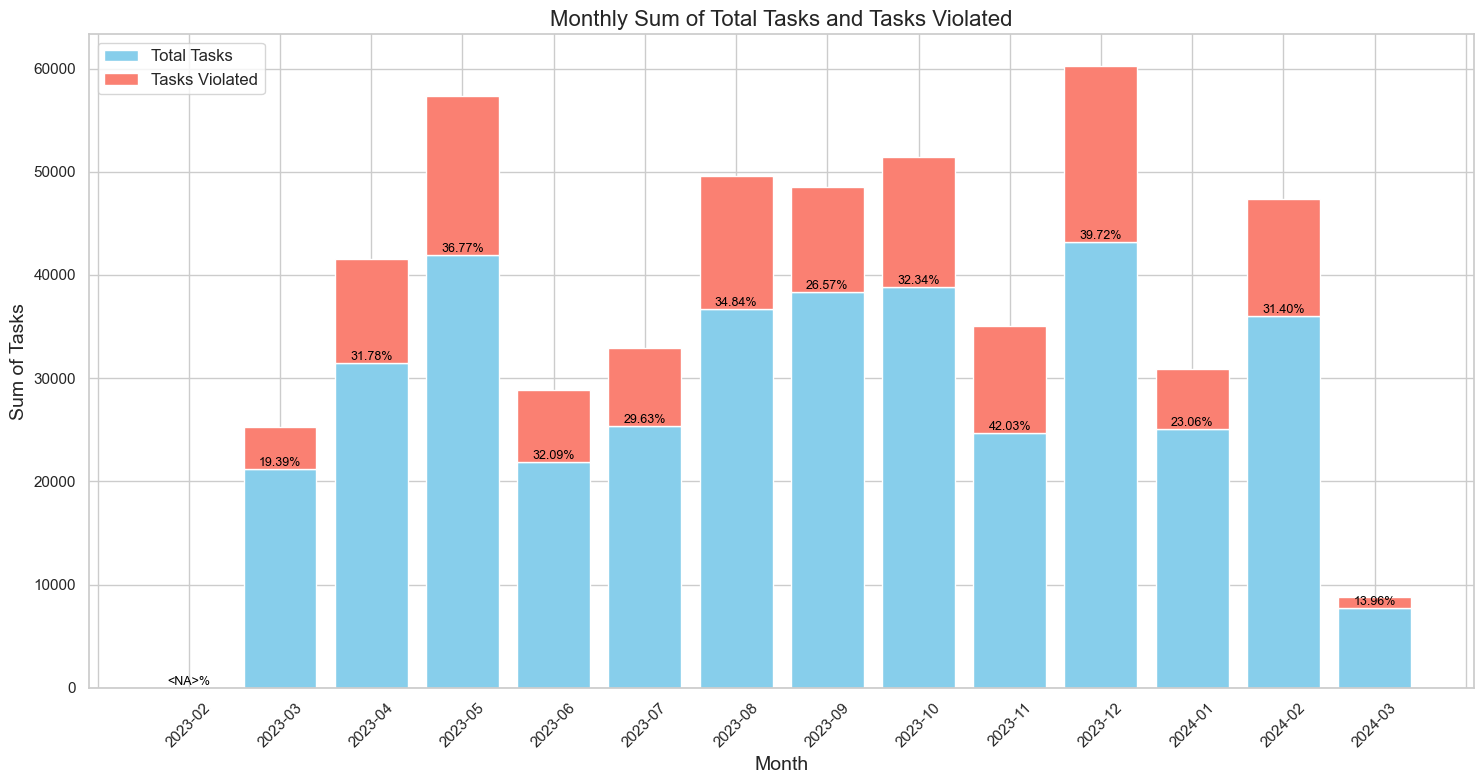

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Assuming df_lead is already defined and preprocessed

# Ensure created_at_date is a datetime object
df_lead['created_at_date'] = pd.to_datetime(df_lead['created_at_date'])

# Filter out any data beyond the last known good date (assuming end of March 2024)
df_lead = df_lead[df_lead['created_at_date'] <= '2024-03-31']

# Group by month and year, calculate the sum for 'total_tasks' and 'tasks_violated'
monthly_sum = df_lead.groupby(df_lead['created_at_date'].dt.to_period('M'))[['total_tasks', 'tasks_violated']].sum()

# Calculate the percentage of tasks violated, handling division by zero
monthly_sum['violated_percentage'] = (monthly_sum['tasks_violated'] / monthly_sum['total_tasks'].replace(0, pd.NA)) * 100

# Create a 'month' column for plotting
monthly_sum['month'] = monthly_sum.index.strftime('%Y-%m')

# Reset the index
monthly_sum.reset_index(drop=True, inplace=True)

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Defining colors
colors = {'total_tasks': 'skyblue', 'tasks_violated': 'salmon'}

# Plotting 'total_tasks' as the base
ax.bar(monthly_sum['month'], monthly_sum['total_tasks'], label='Total Tasks', color=colors['total_tasks'])

# Plotting 'tasks_violated' on top
ax.bar(monthly_sum['month'], monthly_sum['tasks_violated'], label='Tasks Violated', color=colors['tasks_violated'], bottom=monthly_sum['total_tasks'])

# Setting labels and title
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Sum of Tasks', fontsize=14)
ax.set_title('Monthly Sum of Total Tasks and Tasks Violated', fontsize=16)

# Rotate date labels for readability
plt.xticks(rotation=45)

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

# Adding percentage annotations
for idx, row in monthly_sum.iterrows():
    percentage_text = f"{row['violated_percentage']:.2f}%"
    ax.text(idx, row['total_tasks'], percentage_text, ha='center', va='bottom', fontsize=9, color='black')

# Setting x-axis labels to show every month
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()  # Adjust layout
plt.show()


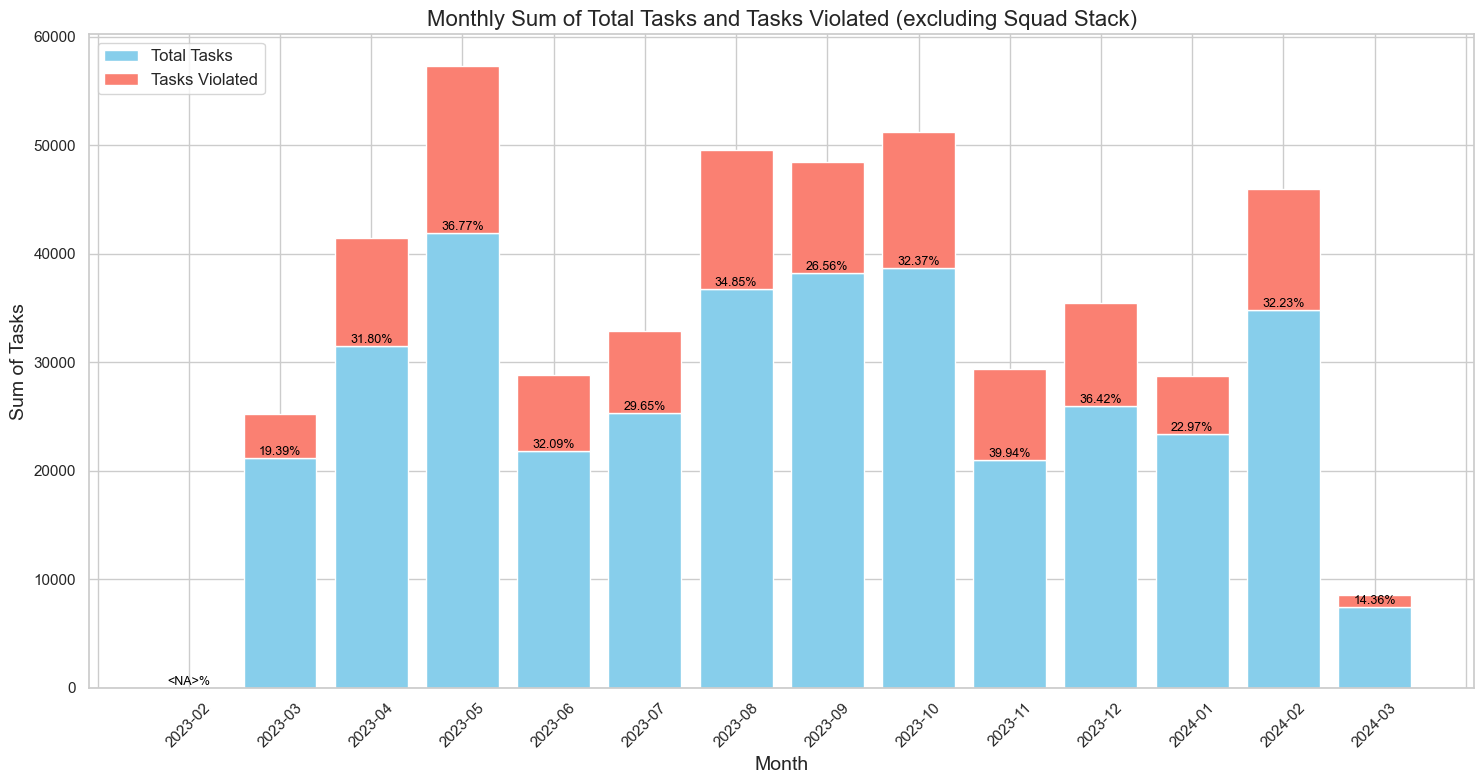

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Assuming df_lead is already defined and preprocessed

# Filter out rows where lqt_agent is 'Squad Stack'
df_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Ensure created_at_date is a datetime object
df_filtered['created_at_date'] = pd.to_datetime(df_filtered['created_at_date'])

# Group by month and year, calculate the sum for 'total_tasks' and 'tasks_violated'
monthly_sum = df_filtered.groupby(df_filtered['created_at_date'].dt.to_period('M'))[['total_tasks', 'tasks_violated']].sum()

# Calculate the percentage of tasks violated, handling division by zero
monthly_sum['violated_percentage'] = (monthly_sum['tasks_violated'] / monthly_sum['total_tasks'].replace(0, pd.NA)) * 100

# Create a 'month' column for plotting
monthly_sum['month'] = monthly_sum.index.strftime('%Y-%m')

# Reset the index
monthly_sum.reset_index(drop=True, inplace=True)

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Defining colors
colors = {'total_tasks': 'skyblue', 'tasks_violated': 'salmon'}

# Plotting 'total_tasks' as the base
ax.bar(monthly_sum['month'], monthly_sum['total_tasks'], label='Total Tasks', color=colors['total_tasks'])

# Plotting 'tasks_violated' on top
ax.bar(monthly_sum['month'], monthly_sum['tasks_violated'], label='Tasks Violated', color=colors['tasks_violated'], bottom=monthly_sum['total_tasks'])

# Setting labels and title
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Sum of Tasks', fontsize=14)
ax.set_title('Monthly Sum of Total Tasks and Tasks Violated (excluding Squad Stack)', fontsize=16)

# Rotate date labels for readability
plt.xticks(rotation=45)

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

# Adding percentage annotations
for idx, row in monthly_sum.iterrows():
    percentage_text = f"{row['violated_percentage']:.2f}%"
    ax.text(idx, row['total_tasks'], percentage_text, ha='center', va='bottom', fontsize=9, color='black')

# Setting x-axis labels to show every month
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()  # Adjust layout
plt.show()


In [91]:
monthly_sum

,total_tasks,tasks_violated,violated_percentage,month
0,0,0,<NA>,2023-02
1,21177,4106,19.38896,2023-03
2,31492,10013,31.795377,2023-04
3,41941,15421,36.768317,2023-05
4,21847,7011,32.091363,2023-06
5,25340,7514,29.652723,2023-07
6,36731,12800,34.847949,2023-08
7,38273,10165,26.559193,2023-09
8,38700,12527,32.369509,2023-10
9,21013,8393,39.941941,2023-11


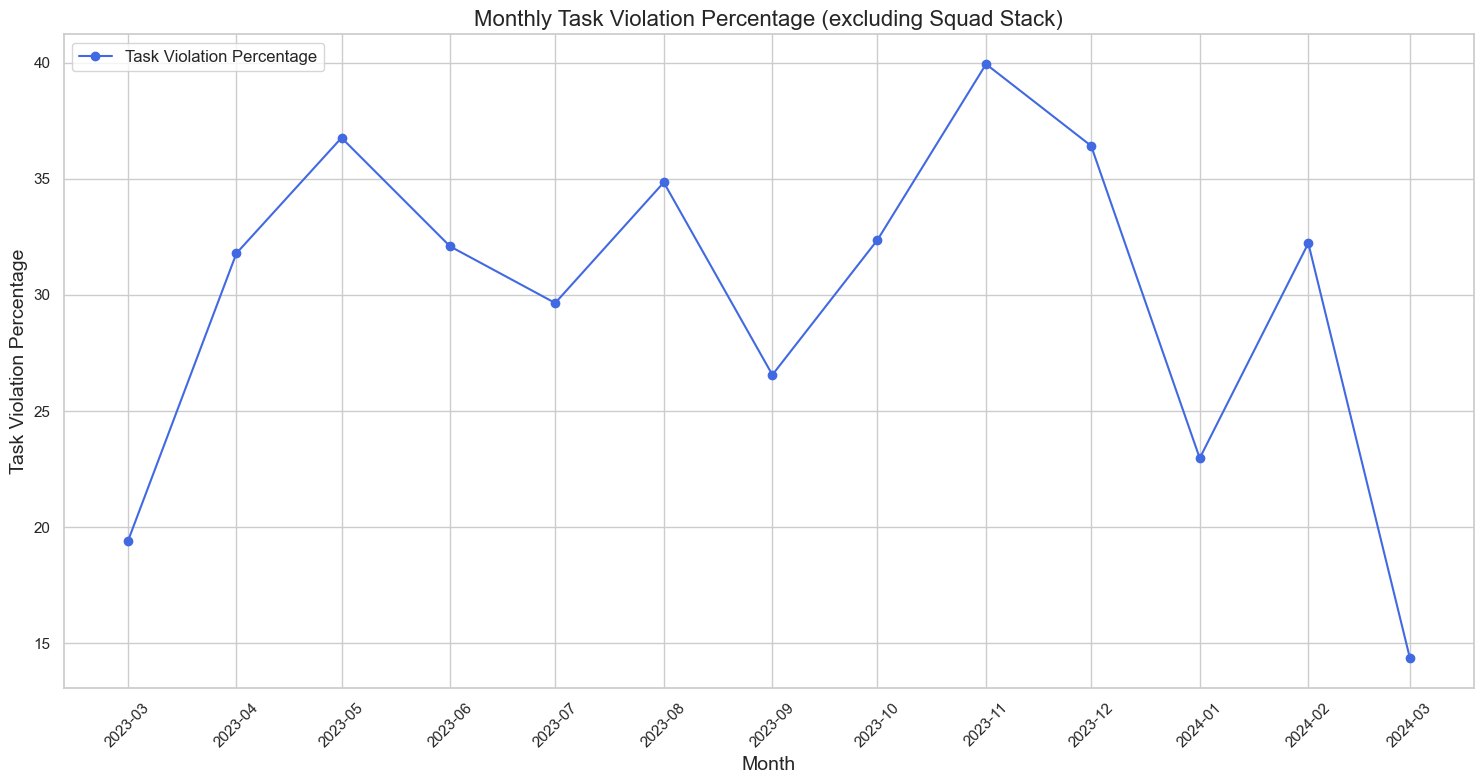

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np  # Make sure to import numpy

# Assuming df_lead is already defined and preprocessed

# Filter out rows where lqt_agent is 'Squad Stack'
df_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Ensure created_at_date is a datetime object
df_filtered['created_at_date'] = pd.to_datetime(df_filtered['created_at_date'])

# Group by month and year, calculate the sum for 'total_tasks' and 'tasks_violated'
monthly_sum = df_filtered.groupby(df_filtered['created_at_date'].dt.to_period('M'))[['total_tasks', 'tasks_violated']].sum()

# Calculate the percentage of tasks violated, handling division by zero
monthly_sum['violated_percentage'] = (monthly_sum['tasks_violated'] / monthly_sum['total_tasks'].replace(0, np.nan)) * 100

# Convert the PeriodIndex to DateTimeIndex for plotting
monthly_sum.index = monthly_sum.index.to_timestamp()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Ensure no 'pd.NA' values are in the series to be plotted, replacing them with 'np.nan'
monthly_sum['violated_percentage'] = monthly_sum['violated_percentage'].fillna(np.nan)

# Plotting the task violation percentage
ax.plot(monthly_sum.index, monthly_sum['violated_percentage'], label='Task Violation Percentage', color='royalblue', marker='o', linestyle='-')

# Setting labels and title
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Task Violation Percentage', fontsize=14)
ax.set_title('Monthly Task Violation Percentage (excluding Squad Stack)', fontsize=16)

# Format the x-axis to show months clearly
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate date labels for readability
plt.xticks(rotation=45)

# Adding a legend
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()  # Adjust layout
plt.show()


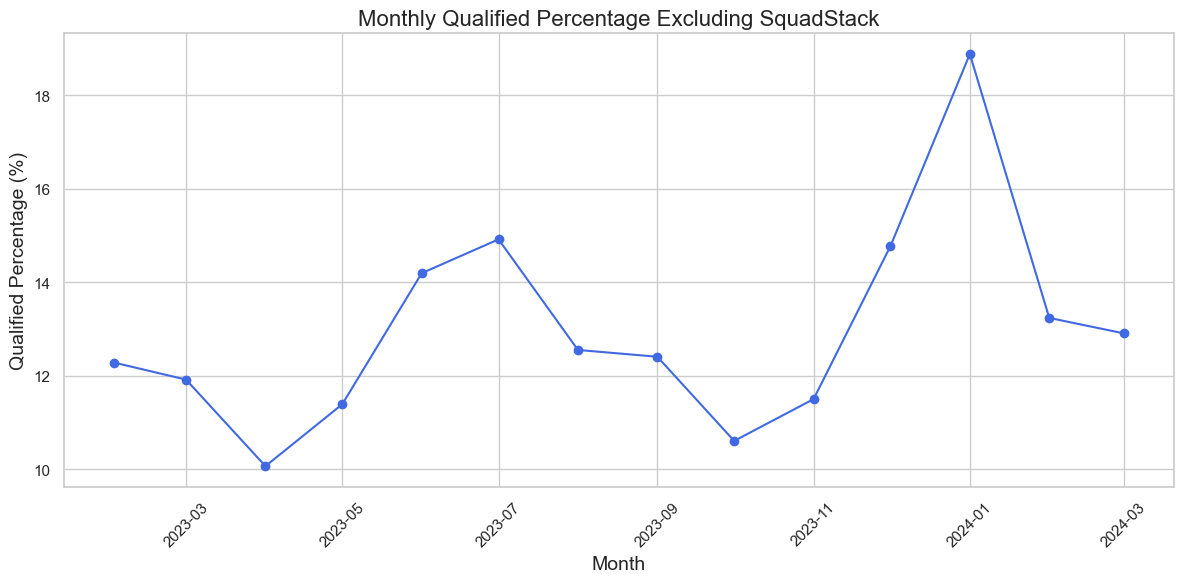

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

df_lead_ss = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Step 1: Ensure 'created_at_date' is in datetime format
df_lead_ss['created_at_date'] = pd.to_datetime(df_lead_ss['created_at_date'])

# Extract year and month for grouping
df_lead_ss['year_month'] = df_lead_ss['created_at_date'].dt.to_period('M')

# Step 2: Group by month and calculate the qualified percentage
monthly_data = df_lead_ss.groupby('year_month').agg(
    total_leads=('lead_id', 'count'),
    qualified_leads=('is_qualified', lambda x: (x == 1).sum())
).reset_index()

# Calculate the qualified percentage
monthly_data['qualified_percentage'] = (monthly_data['qualified_leads'] / monthly_data['total_leads']) * 100

# Convert 'year_month' from Period to datetime for plotting
monthly_data['year_month'] = monthly_data['year_month'].dt.to_timestamp()

# Step 3: Plot the qualified percentage over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['year_month'], monthly_data['qualified_percentage'], marker='o', linestyle='-', color='royalblue')

# Setting up the plot
plt.title('Monthly Qualified Percentage Excluding SquadStack', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Qualified Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


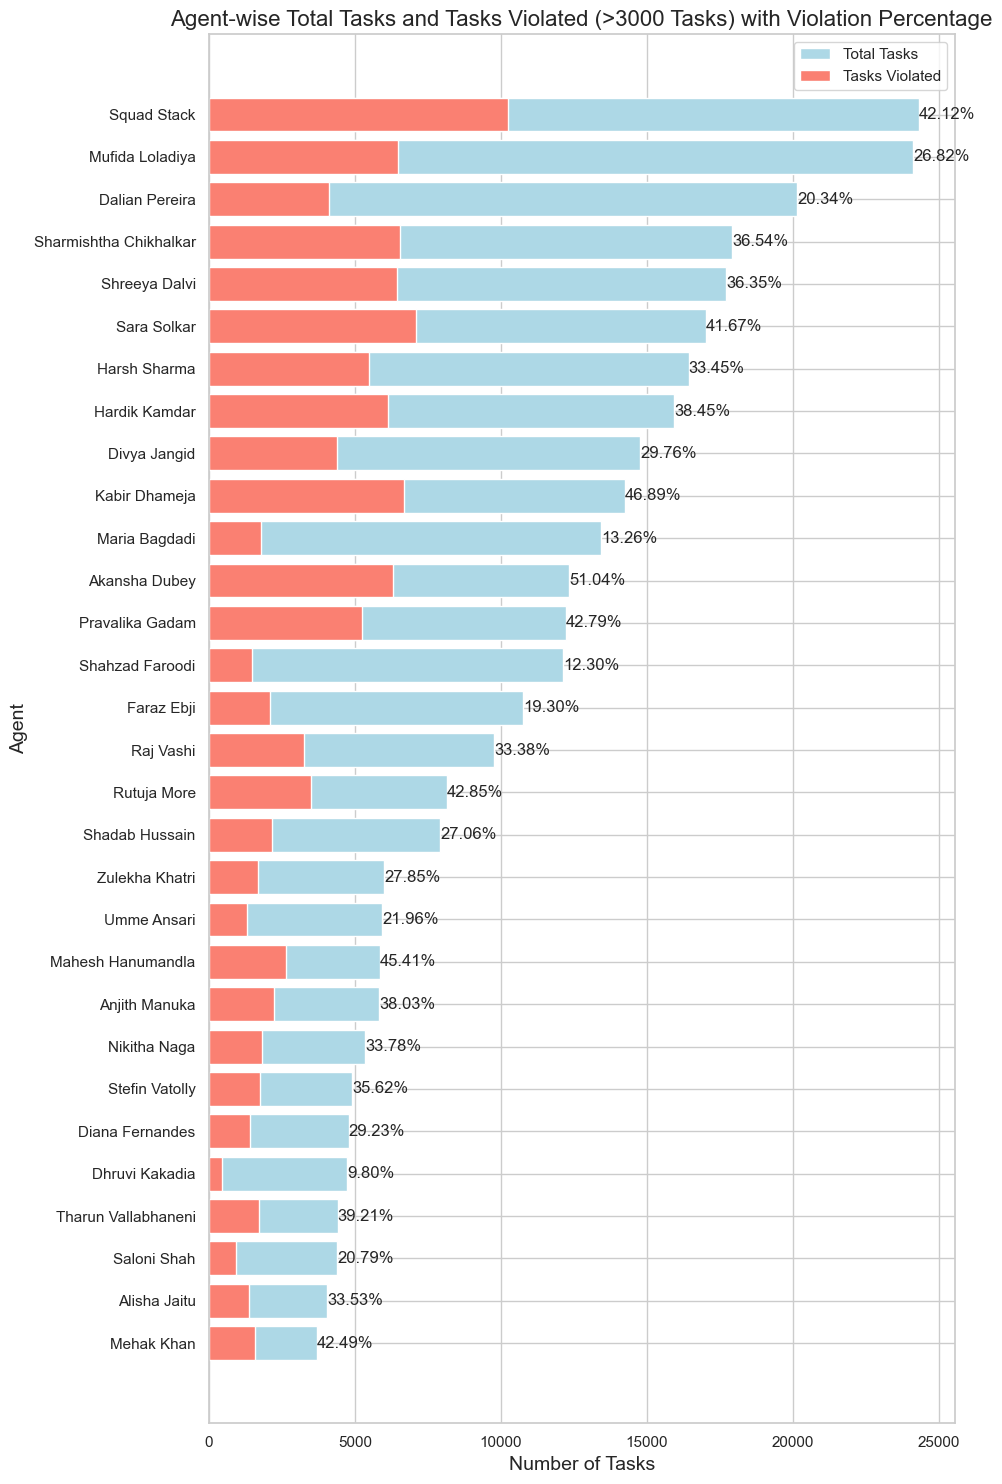

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_lead is your DataFrame

# Aggregate by lqt_agent and filter
agent_summary = df_lead.groupby('lqt_agent')[['total_tasks', 'tasks_violated']].sum()
agents_filtered = agent_summary[agent_summary['total_tasks'] > 3000]

# Sorting for visualization
agents_sorted = agents_filtered.sort_values(by='total_tasks', ascending=True)

# Calculate the percentage of tasks violated
agents_sorted['violated_percentage'] = (agents_sorted['tasks_violated'] / agents_sorted['total_tasks']) * 100

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, len(agents_sorted) / 2))  # Adjust size as needed
plt.barh(agents_sorted.index, agents_sorted['total_tasks'], color='lightblue', label='Total Tasks')
plt.barh(agents_sorted.index, agents_sorted['tasks_violated'], color='salmon', label='Tasks Violated')

# Annotating with the percentage of tasks violated
for index, value in enumerate(agents_sorted.index):
    percentage = f"{agents_sorted.loc[value, 'violated_percentage']:.2f}%"
    plt.text(agents_sorted.loc[value, 'total_tasks'], index, percentage, va='center')

plt.title('Agent-wise Total Tasks and Tasks Violated (>3000 Tasks) with Violation Percentage', fontsize=16)
plt.xlabel('Number of Tasks', fontsize=14)
plt.ylabel('Agent', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


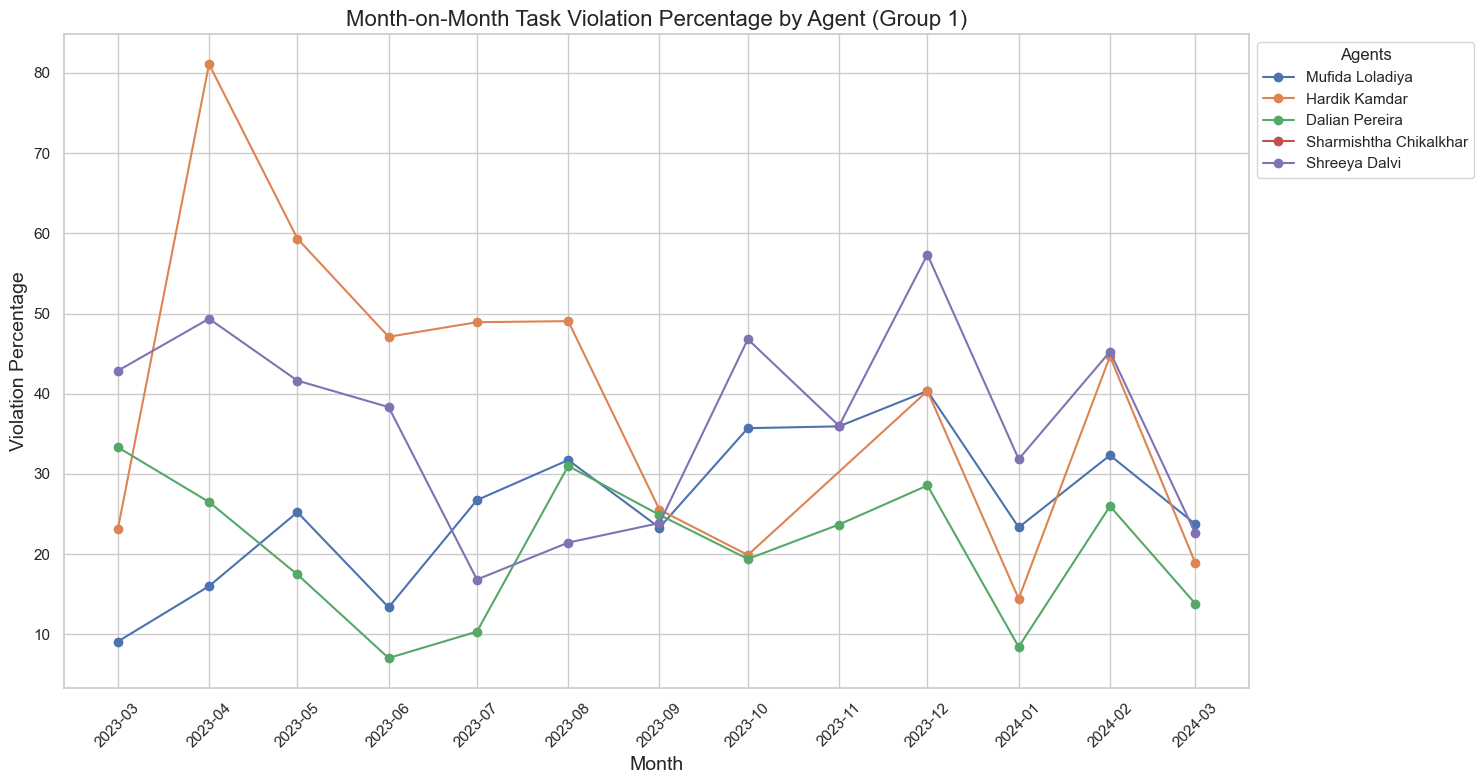

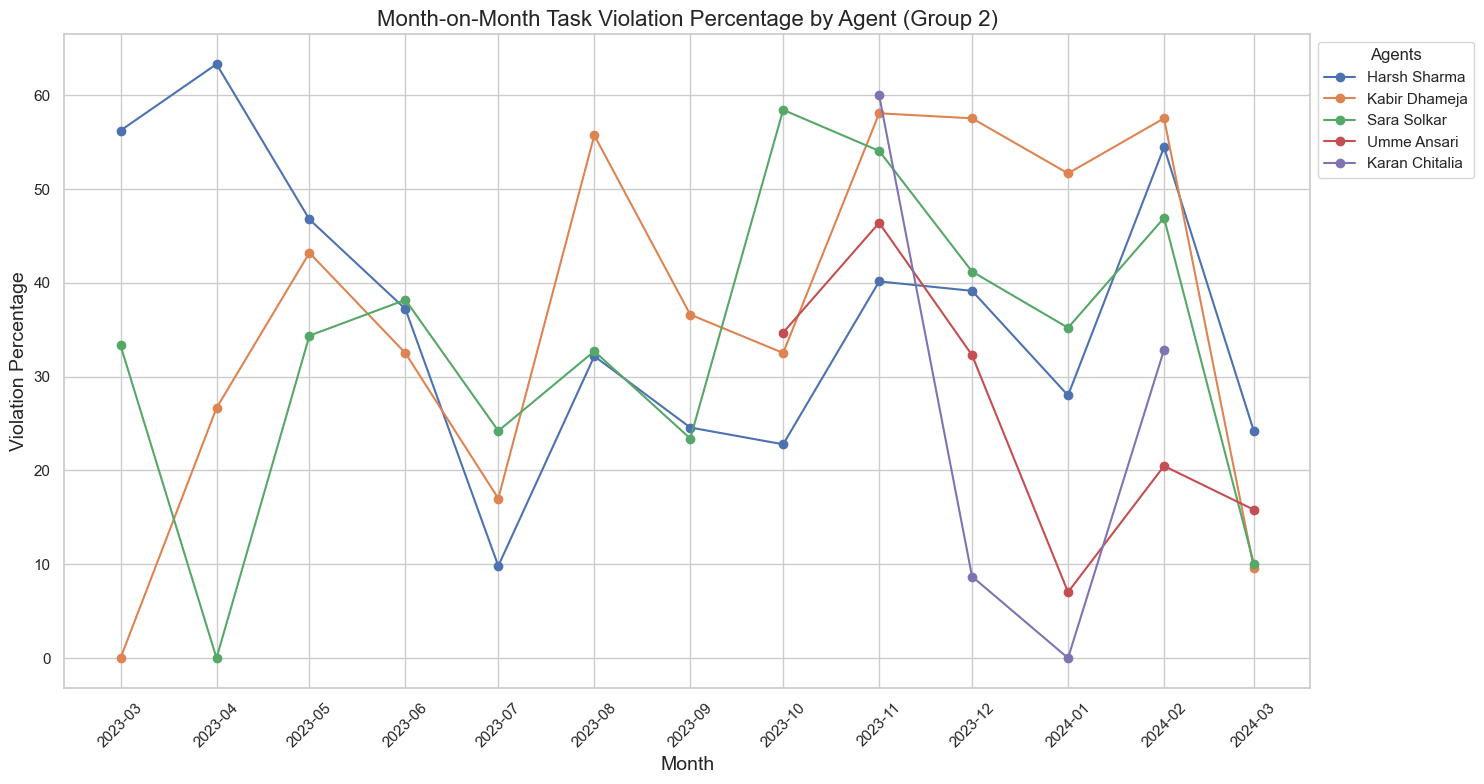

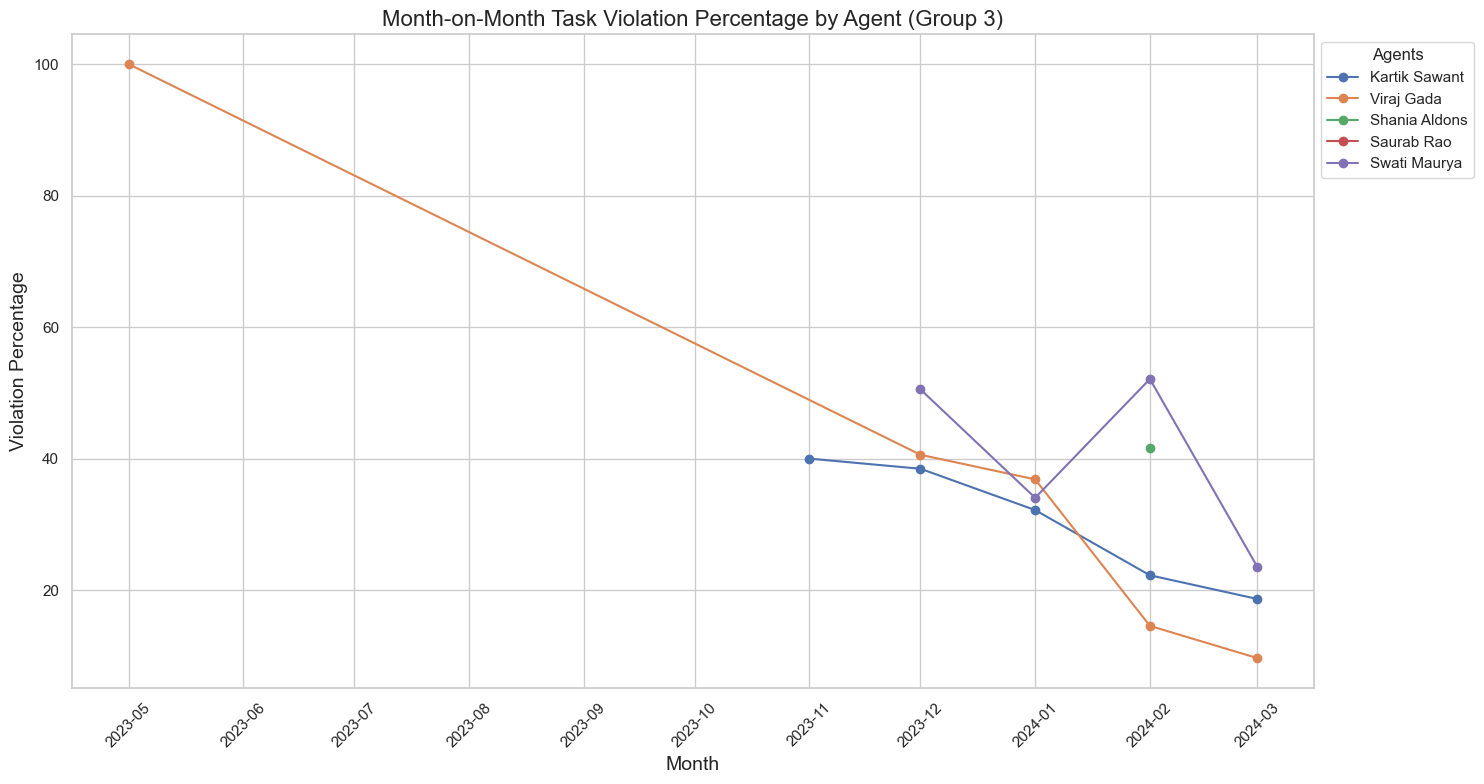

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Divide the specified agents into three groups
agent_groups = [
    ["Mufida Loladiya", "Hardik Kamdar", "Dalian Pereira", "Sharmishtha Chikalkhar", "Shreeya Dalvi"],
    ["Harsh Sharma", "Kabir Dhameja", "Sara Solkar", "Umme Ansari", "Karan Chitalia"],
    ["Kartik Sawant", "Viraj Gada", "Shania Aldons", "Saurab Rao", "Swati Maurya"]
]

# Ensure created_at_date is a datetime object for aggregation
df_lead['created_at_date'] = pd.to_datetime(df_lead['created_at_date'])

# Group by agent and month, then calculate the sums and violation percentage
monthly_agent_sum = df_lead.groupby([df_lead['lqt_agent'], df_lead['created_at_date'].dt.to_period('M')])[['total_tasks', 'tasks_violated']].sum()
monthly_agent_sum['violated_percentage'] = (monthly_agent_sum['tasks_violated'] / monthly_agent_sum['total_tasks']) * 100
monthly_agent_sum.reset_index(inplace=True)
monthly_agent_sum['month'] = monthly_agent_sum['created_at_date'].dt.to_timestamp()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid")

# Plot each group of agents
for i, agents in enumerate(agent_groups, start=1):
    plt.figure(figsize=(15, 8))
    for agent in agents:
        agent_data = monthly_agent_sum[monthly_agent_sum['lqt_agent'] == agent]
        plt.plot(agent_data['month'], agent_data['violated_percentage'], label=agent, marker='o')

    # Formatting the plot
    plt.title(f'Month-on-Month Task Violation Percentage by Agent (Group {i})', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Violation Percentage', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Agents')

    # Format the x-axis to show months clearly
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.tight_layout()
    plt.show()


In [627]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost
0,104371,2023-03-01 00:32:00,LOST,Sparsh Shetty,NaN,LOST,2023-03-08 07:11:00,unicreds,NaN,NaN,...,2,2,0.0,0.0,0.0,42.857143,1,100.0,0,1
1,104394,2023-03-01 01:02:00,LOST,Diana Fernandes,NaN,LOST,2023-03-02 12:39:00,google,NaN,src-generic-core-tg-canada-geo-mumbai,...,1,0,0.0,0.0,0.0,200.000000,0,0.0,0,1
2,104399,2023-03-01 01:20:00,LOST,Faraz Ebji,Mumbai - HO,OPPORTUNITY,2023-03-03 14:48:00,unicreds,03/03/23 20:37,NaN,...,1,0,0.0,0.0,0.0,100.000000,0,0.0,1,1
3,104400,2023-03-01 01:22:00,LOST,Densy Ukkan,NaN,LOST,2023-03-09 13:22:00,unicreds,NaN,NaN,...,2,2,0.0,0.0,0.0,62.500000,0,100.0,0,1
4,104403,2023-03-01 01:26:00,LOST,Diana Fernandes,Mumbai - HO,OPPORTUNITY,2023-03-02 10:51:00,google,02/03/23 17:48,src-generic-core-tg-uk-geo-mumbai,...,1,0,0.0,0.0,0.0,200.000000,0,0.0,1,1


<Figure size 1000x600 with 0 Axes>

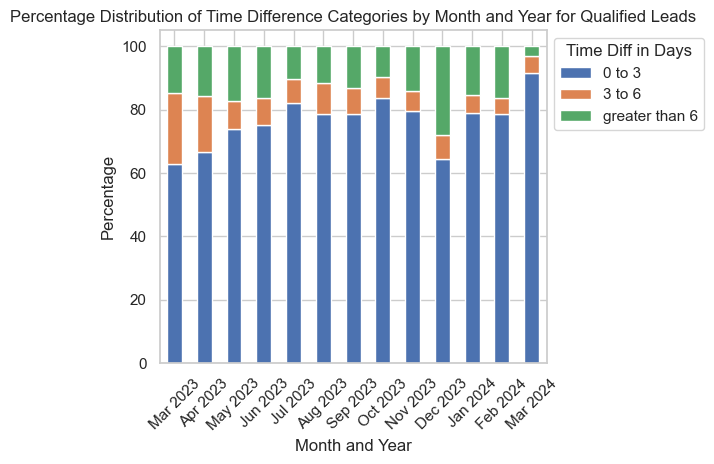

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_lead is your full dataframe.

# Filter dataframe where is_qualified == 1
df_qualified = df_lead[df_lead['is_qualified'] == 1].copy()

# Convert 'created_at' to datetime if it's not already
df_qualified['lead_created_at'] = pd.to_datetime(df_qualified['lead_created_at'])

# Extract month_year from 'created_at'
df_qualified['month_year'] = df_qualified['lead_created_at'].dt.to_period('M')

# Categorize 'time_diff_in_days' into groups
df_qualified['time_diff_category'] = pd.cut(df_qualified['time_diff_in_days'], 
                                            bins=[-1, 3, 6, float('inf')], 
                                            labels=['0 to 3', '3 to 6', 'greater than 6'])

# Calculate percentage distribution for each category per month_year
distribution = df_qualified.groupby(['month_year', 'time_diff_category']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
distribution_percentage.plot(kind='bar', stacked=True)

plt.xticks(ticks=range(len(distribution_percentage.index)), labels=distribution_percentage.index.strftime('%b %Y'), rotation=45)

plt.xlabel('Month and Year')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Time Difference Categories by Month and Year for Qualified Leads')

# Adjusting the legend's position
plt.legend(title='Time Diff in Days', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

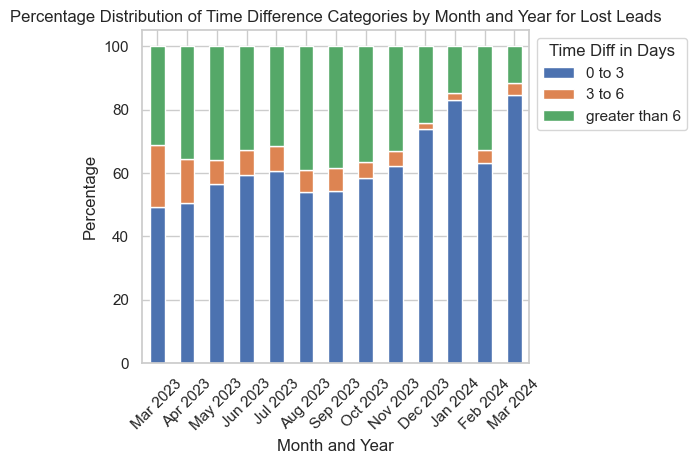

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_lead is your full dataframe.

# Filter dataframe where is_qualified == 1
df_lost = df_lead[df_lead['is_lost'] == 1].copy()

# Convert 'created_at' to datetime if it's not already
df_lost['lead_created_at'] = pd.to_datetime(df_lost['lead_created_at'])

# Extract month_year from 'created_at'
df_lost['month_year'] = df_lost['lead_created_at'].dt.to_period('M')

# Categorize 'time_diff_in_days' into groups
df_lost['time_diff_category'] = pd.cut(df_lost['time_diff_in_days'], 
                                            bins=[-1, 3, 6, float('inf')], 
                                            labels=['0 to 3', '3 to 6', 'greater than 6'])

# Calculate percentage distribution for each category per month_year
distribution = df_lost.groupby(['month_year', 'time_diff_category']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
distribution_percentage.plot(kind='bar', stacked=True)

plt.xticks(ticks=range(len(distribution_percentage.index)), labels=distribution_percentage.index.strftime('%b %Y'), rotation=45)

plt.xlabel('Month and Year')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Time Difference Categories by Month and Year for Lost Leads')

# Adjusting the legend's position
plt.legend(title='Time Diff in Days', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()


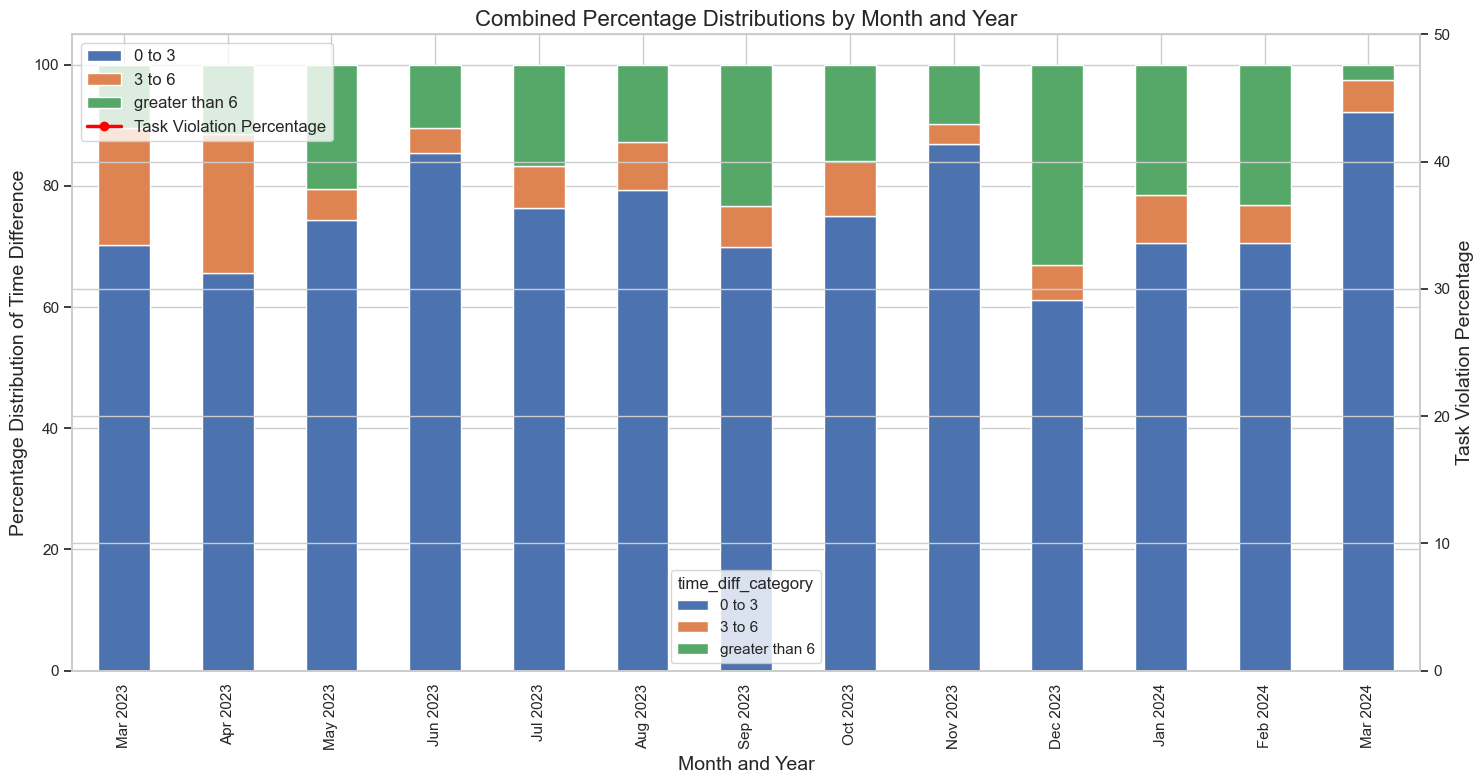

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Assuming df_lead is already defined and preprocessed

# For the task violation percentage graph
df_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()
df_filtered['created_at_date'] = pd.to_datetime(df_filtered['created_at_date'])
monthly_sum = df_filtered.groupby(df_filtered['created_at_date'].dt.to_period('M'))[['total_tasks', 'tasks_violated']].sum()
monthly_sum['violated_percentage'] = (monthly_sum['tasks_violated'] / monthly_sum['total_tasks'].replace(0, pd.NA)) * 100
monthly_sum.index = monthly_sum.index.to_timestamp()

# For the time difference category graph
df_qualified = df_lead[df_lead['is_qualified'] == 1].copy()
df_qualified['created_at'] = pd.to_datetime(df_qualified['created_at'])
df_qualified['month_year'] = df_qualified['created_at'].dt.to_period('M')
df_qualified['time_diff_category'] = pd.cut(df_qualified['time_diff_in_days'], bins=[-1, 3, 6, float('inf')], labels=['0 to 3', '3 to 6', 'greater than 6'])
distribution = df_qualified.groupby(['month_year', 'time_diff_category']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100

# Convert the PeriodIndex to DateTimeIndex for plotting
distribution_percentage.index = distribution_percentage.index.to_timestamp()

# ... your previous code for data preparation goes here ...

# Start plotting
fig, ax1 = plt.subplots(figsize=(15, 8))

# Bar plot for time difference category distribution
distribution_percentage.plot(kind='bar', stacked=True, ax=ax1)

# Set the x-axis to be the same as the line plot
ax1.set_xticks(range(len(distribution_percentage.index)))
ax1.set_xticklabels(distribution_percentage.index.strftime('%b %Y'))
ax1.set_xlabel('Month and Year', fontsize=14)
ax1.set_ylabel('Percentage Distribution of Time Difference', fontsize=14)

# Ensure the task violation percentage line will be visible by adjusting its scale
max_task_violation = monthly_sum['violated_percentage'].max()

# Create a secondary y-axis for the task violation percentage
ax2 = ax1.twinx()

# Make sure the secondary y-axis has a proper scale for the task violation data
# Setting the y-axis with a wider range might help in case the data values are low
ax2.set_ylim(0, max(max_task_violation, 50))  # Adjust the second argument according to your data range

# Plot the task violation percentage with red color and increased line width for visibility
ax2.plot(monthly_sum.index, monthly_sum['violated_percentage'], label='Task Violation Percentage', color='red', marker='o', linestyle='-', linewidth=2.5)
ax2.set_ylabel('Task Violation Percentage', fontsize=14)

# Title and aesthetics
plt.title('Combined Percentage Distributions by Month and Year', fontsize=16)

# Legend
# Combining legend entries and showing a single legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=12)

fig.tight_layout()  # Adjust layout
plt.show()


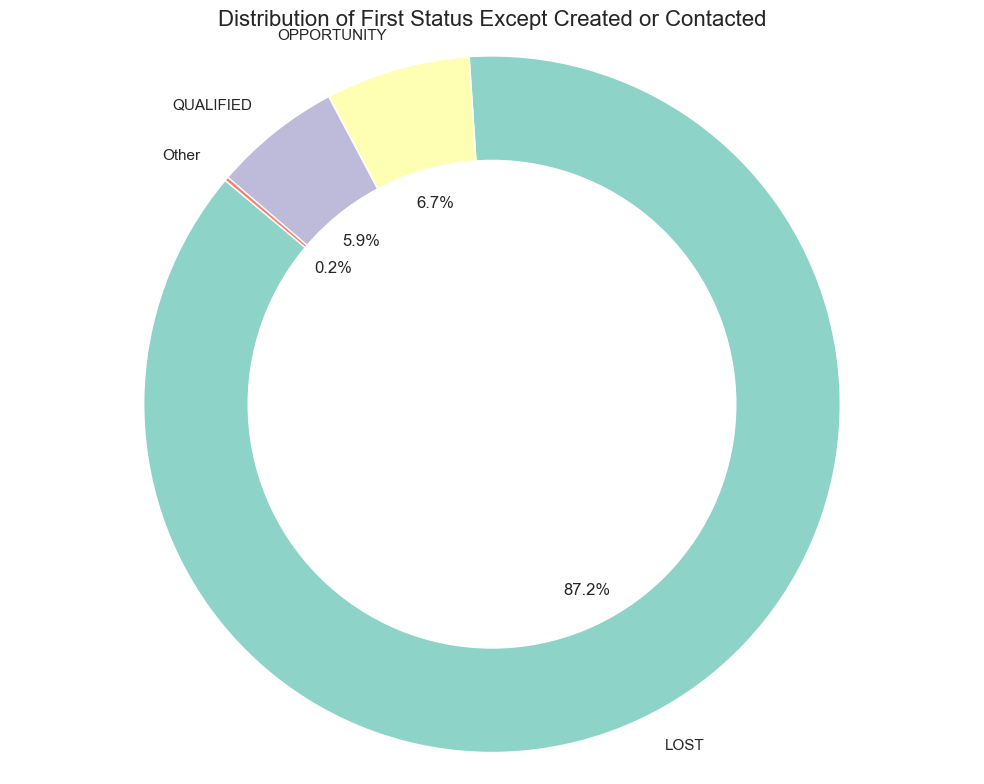

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_lead is your DataFrame

# Aggregate data
status_counts = df_lead['first_status_except_created_or_contacted'].value_counts()

# Combine smaller categories into 'Other'
other_threshold = 0.05  # Threshold to combine categories, e.g., 5%
status_counts_combined = status_counts[status_counts >= other_threshold * status_counts.sum()]
status_counts_other = status_counts[status_counts < other_threshold * status_counts.sum()]
if not status_counts_other.empty:
    status_counts_combined['Other'] = status_counts_other.sum()

# Enhancing aesthetics with seaborn
sns.set(style="whitegrid", palette="pastel")

# Plotting
plt.figure(figsize=(10, 8))  # Adjust for your display preferences
plt.pie(status_counts_combined, labels=status_counts_combined.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

plt.title('Distribution of First Status Except Created or Contacted', fontsize=16)

# Adding a circle at the center to turn it into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [531]:
import pandas as pd

# Assuming df_lead is your DataFrame

# Calculate the correlation between tasks_violation_percentage and is_qualified
corr_qualified = df_lead[['tasks_violation_percentage', 'is_qualified']].corr()

# Calculate the correlation between tasks_violation_percentage and is_lost
corr_lost = df_lead[['tasks_violation_percentage', 'is_lost']].corr()

# Display the correlations
print("Correlation between tasks_violation_percentage and is_qualified:\n", corr_qualified)
print("\nCorrelation between tasks_violation_percentage and is_lost:\n", corr_lost)


Correlation between tasks_violation_percentage and is_qualified:
                             tasks_violation_percentage  is_qualified
tasks_violation_percentage                    1.000000      0.006283
is_qualified                                  0.006283      1.000000

Correlation between tasks_violation_percentage and is_lost:
                             tasks_violation_percentage   is_lost
tasks_violation_percentage                    1.000000 -0.001578
is_lost                                      -0.001578  1.000000


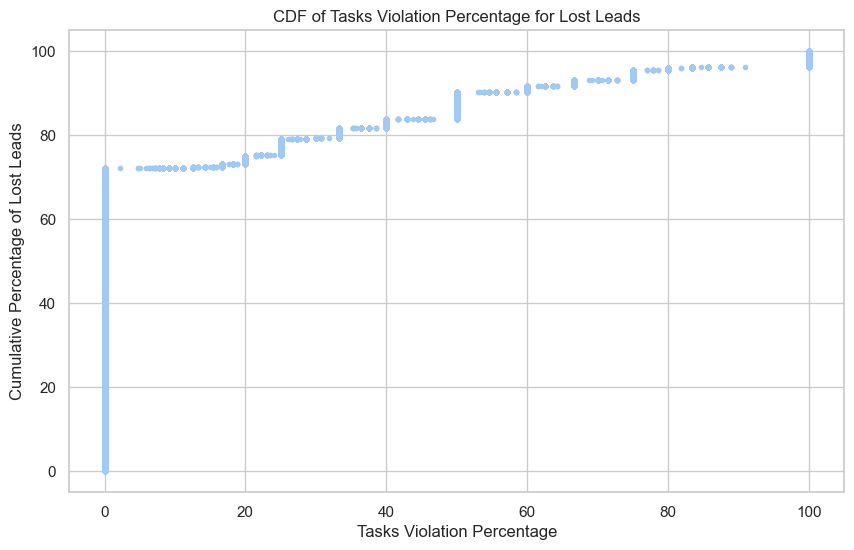

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_lead is your DataFrame and it's already loaded

# Filter the DataFrame to include only lost leads
lost_leads_df = df_lead[df_lead['is_lost'] == 1]

# Sort the DataFrame by tasks_violation_percentage to prepare for CDF calculation
sorted_df = lost_leads_df.sort_values(by='tasks_violation_percentage')

# Calculate the CDF values
cdf_values = np.linspace(0, 100, len(sorted_df))
plt.figure(figsize=(10, 6))

# Plot the CDF
plt.plot(sorted_df['tasks_violation_percentage'], cdf_values, marker='.', linestyle='none')

plt.xlabel('Tasks Violation Percentage')
plt.ylabel('Cumulative Percentage of Lost Leads')
plt.title('CDF of Tasks Violation Percentage for Lost Leads')
plt.grid(True)

# Show plot
plt.show()




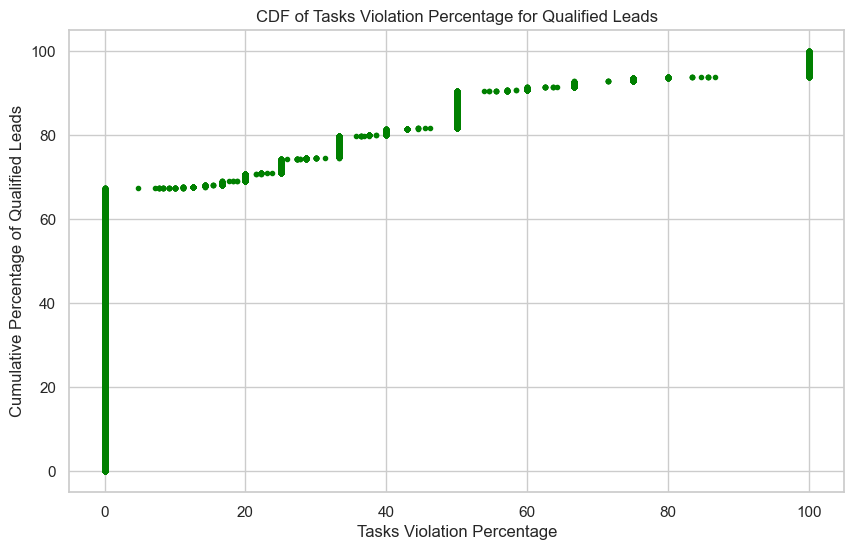

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_lead is your DataFrame and it's already loaded

# Filter the DataFrame to include only qualified leads
qualified_leads_df = df_lead[df_lead['is_qualified'] == 1]

# Sort the DataFrame by tasks_violation_percentage to prepare for CDF calculation
sorted_df_qualified = qualified_leads_df.sort_values(by='tasks_violation_percentage')

# Calculate the CDF values
cdf_values_qualified = np.linspace(0, 100, len(sorted_df_qualified))
plt.figure(figsize=(10, 6))

# Plot the CDF
plt.plot(sorted_df_qualified['tasks_violation_percentage'], cdf_values_qualified, marker='.', linestyle='none', color='green')

plt.xlabel('Tasks Violation Percentage')
plt.ylabel('Cumulative Percentage of Qualified Leads')
plt.title('CDF of Tasks Violation Percentage for Qualified Leads')
plt.grid(True)

# Show plot
plt.show()


In [225]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,created_at_date,...,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost
0,104367,2023-03-01 00:25:00,LOST,Faraz Ebji,Mumbai - HO,OPPORTUNITY,2023-03-03 14:19:00,google,04/03/23 12:50,2023-03-01,...,2,0,0.0,0.0,0.0,150.0,1,0.000000,1,1
1,104381,2023-03-01 00:41:00,LOST,Gaurav Gupta,NaN,LOST,2023-03-01 10:41:00,NaN,NaN,2023-03-01,...,0,0,0.0,0.0,0.0,0.0,0,0.000000,0,1
2,104388,2023-03-01 00:58:00,LOST,Faraz Ebji,NaN,LOST,2023-03-06 11:19:00,unicreds,NaN,2023-03-01,...,2,0,0.0,0.0,0.0,20.0,0,0.000000,0,1
3,104414,2023-03-01 02:27:00,LOST,Diana Fernandes,NaN,LOST,2023-03-11 12:28:00,google,NaN,2023-03-01,...,3,2,0.0,0.0,0.0,40.0,0,66.666667,0,1
4,104434,2023-03-01 04:24:00,LOST,Rutuja More,NaN,LOST,2023-03-02 06:31:00,unischolars?utm_medium=organic?utm_campaign=sc...,NaN,2023-03-01,...,0,0,0.0,0.0,0.0,100.0,1,0.000000,0,1


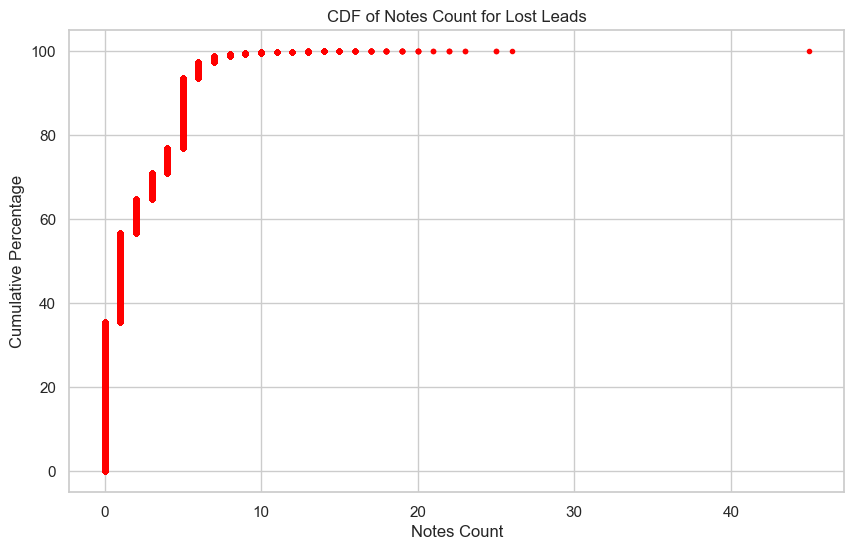

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame for lost leads
lost_leads_df = df_lead[df_lead['is_lost'] == 1]

# Sort the DataFrame by notes_count to prepare for CDF calculation
sorted_lost = lost_leads_df.sort_values(by='notes_count')

# Calculate the CDF values for lost leads
cdf_values_lost = np.linspace(0, 100, len(sorted_lost))

# Plotting CDF for lost leads
plt.figure(figsize=(10, 6))
plt.plot(sorted_lost['notes_count'], cdf_values_lost, marker='.', linestyle='none', color='red')
plt.xlabel('Notes Count')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Notes Count for Lost Leads')
plt.grid(True)
plt.show()


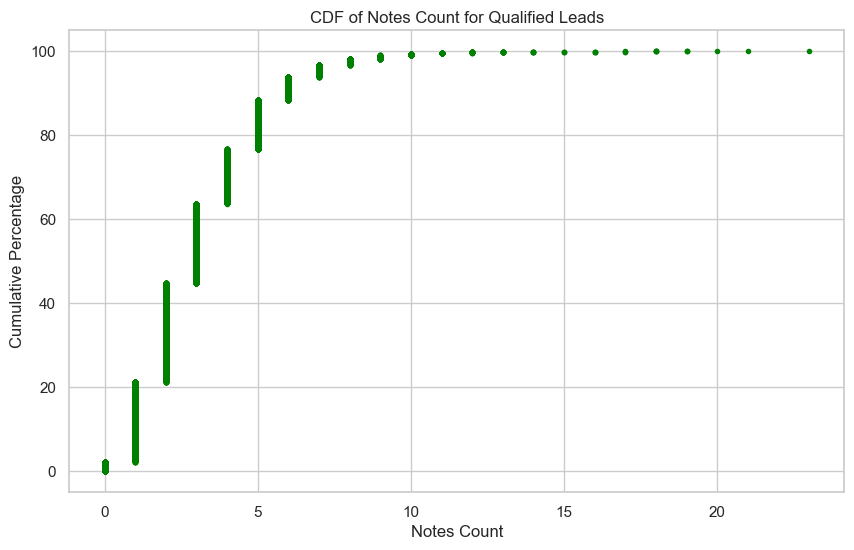

In [227]:
# Filter the DataFrame for qualified leads
qualified_leads_df = df_lead[df_lead['is_qualified'] == 1]

# Sort the DataFrame by notes_count to prepare for CDF calculation
sorted_qualified = qualified_leads_df.sort_values(by='notes_count')

# Calculate the CDF values for qualified leads
cdf_values_qualified = np.linspace(0, 100, len(sorted_qualified))

# Plotting CDF for qualified leads
plt.figure(figsize=(10, 6))
plt.plot(sorted_qualified['notes_count'], cdf_values_qualified, marker='.', linestyle='none', color='green')
plt.xlabel('Notes Count')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Notes Count for Qualified Leads')
plt.grid(True)
plt.show()


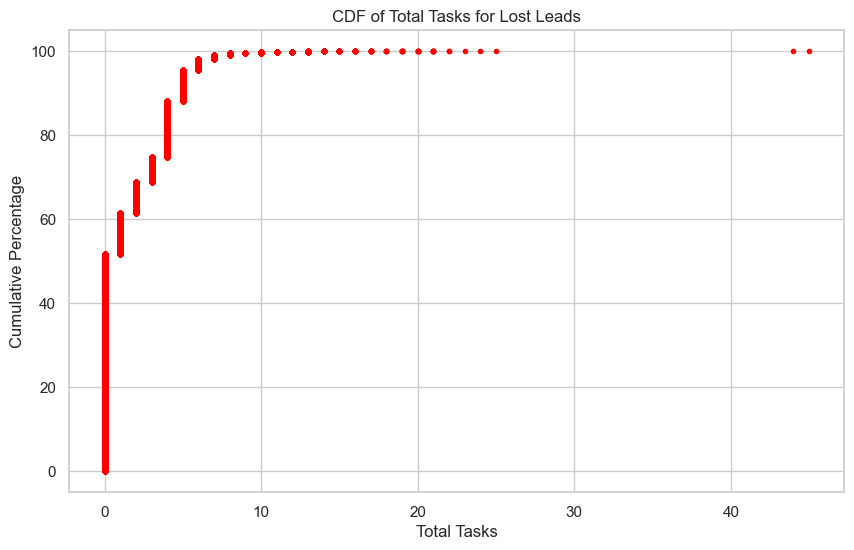

In [228]:
# Filter the DataFrame for lost leads
lost_leads_df_tasks = df_lead[df_lead['is_lost'] == 1]

# Sort the DataFrame by total_tasks to prepare for CDF calculation
sorted_lost_tasks = lost_leads_df_tasks.sort_values(by='total_tasks')

# Calculate the CDF values for lost leads
cdf_values_lost_tasks = np.linspace(0, 100, len(sorted_lost_tasks))

# Plotting CDF for lost leads
plt.figure(figsize=(10, 6))
plt.plot(sorted_lost_tasks['total_tasks'], cdf_values_lost_tasks, marker='.', linestyle='none', color='red')
plt.xlabel('Total Tasks')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Total Tasks for Lost Leads')
plt.grid(True)
plt.show()


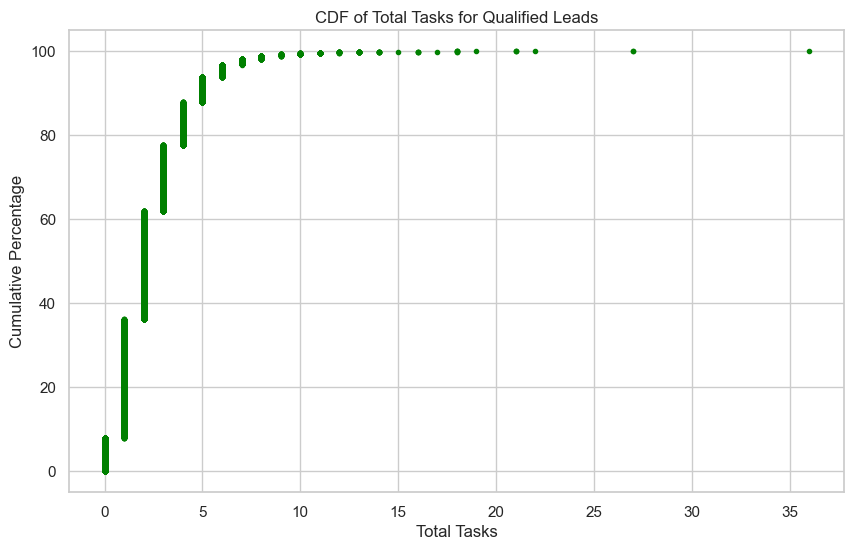

In [229]:
# Filter the DataFrame for qualified leads
qualified_leads_df_tasks = df_lead[df_lead['is_qualified'] == 1]

# Sort the DataFrame by total_tasks to prepare for CDF calculation
sorted_qualified_tasks = qualified_leads_df_tasks.sort_values(by='total_tasks')

# Calculate the CDF values for qualified leads
cdf_values_qualified_tasks = np.linspace(0, 100, len(sorted_qualified_tasks))

# Plotting CDF for qualified leads
plt.figure(figsize=(10, 6))
plt.plot(sorted_qualified_tasks['total_tasks'], cdf_values_qualified_tasks, marker='.', linestyle='none', color='green')
plt.xlabel('Total Tasks')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Total Tasks for Qualified Leads')
plt.grid(True)
plt.show()


In [230]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,created_at_date,...,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost
0,104367,2023-03-01 00:25:00,LOST,Faraz Ebji,Mumbai - HO,OPPORTUNITY,2023-03-03 14:19:00,google,04/03/23 12:50,2023-03-01,...,2,0,0.0,0.0,0.0,150.0,1,0.000000,1,1
1,104381,2023-03-01 00:41:00,LOST,Gaurav Gupta,NaN,LOST,2023-03-01 10:41:00,NaN,NaN,2023-03-01,...,0,0,0.0,0.0,0.0,0.0,0,0.000000,0,1
2,104388,2023-03-01 00:58:00,LOST,Faraz Ebji,NaN,LOST,2023-03-06 11:19:00,unicreds,NaN,2023-03-01,...,2,0,0.0,0.0,0.0,20.0,0,0.000000,0,1
3,104414,2023-03-01 02:27:00,LOST,Diana Fernandes,NaN,LOST,2023-03-11 12:28:00,google,NaN,2023-03-01,...,3,2,0.0,0.0,0.0,40.0,0,66.666667,0,1
4,104434,2023-03-01 04:24:00,LOST,Rutuja More,NaN,LOST,2023-03-02 06:31:00,unischolars?utm_medium=organic?utm_campaign=sc...,NaN,2023-03-01,...,0,0,0.0,0.0,0.0,100.0,1,0.000000,0,1


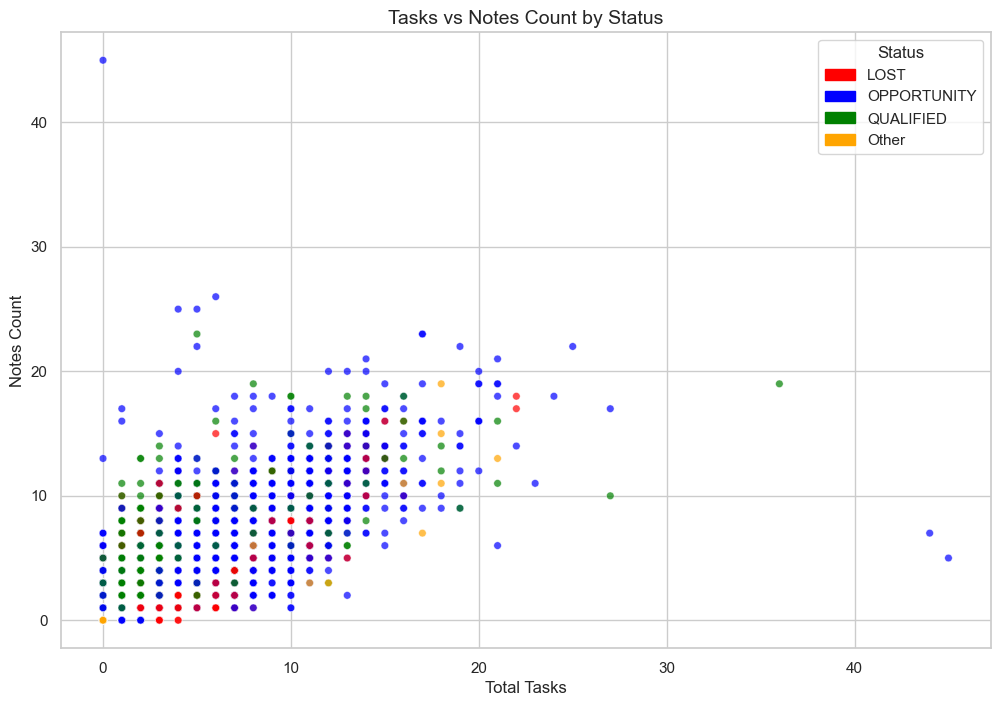

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Import patches correctly



# Create a new column for plotting colors based on 'first_status_except_created_or_contacted'
def status_color(status):
    if status == 'LOST':
        return 'red'
    elif status == 'OPPORTUNITY':
        return 'blue'
    elif status == 'QUALIFIED':
        return 'green'
    else:
        return 'orange'  # Combine the rest into 'Other'

df_lead['plot_color']= df_lead['first_status_except_created_or_contacted'].apply(status_color)

# Plotting setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot
sns.scatterplot(data=df_lead, x='total_tasks', y='notes_count', hue='plot_color', palette=['red', 'blue', 'green', 'orange'], s=30, alpha=0.7)

# Customizing the legend manually
plt.legend(handles=[mpatches.Patch(color='red', label='LOST'),
                    mpatches.Patch(color='blue', label='OPPORTUNITY'),
                    mpatches.Patch(color='green', label='QUALIFIED'),
                    mpatches.Patch(color='orange', label='Other')], title='Status')

plt.xlabel('Total Tasks', fontsize=12)
plt.ylabel('Notes Count', fontsize=12)
plt.title('Tasks vs Notes Count by Status', fontsize=14)

plt.show()

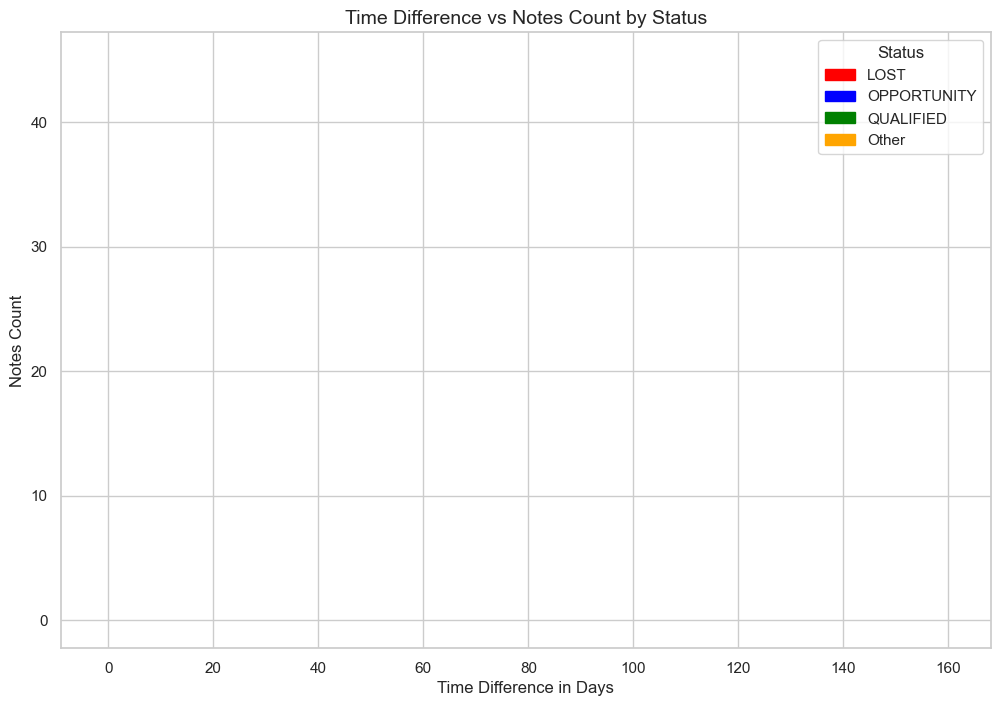

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Make sure patches are imported

# I'm assuming you have a column named 'notes' in your dataframe.
# If the column has a different name, replace 'notes' with the correct column name.

# Create a new column for plotting colors based on 'first_status_except_created_or_contacted'
def status_color(status):
    if status == 'LOST':
        return 'red'
    elif status == 'OPPORTUNITY':
        return 'blue'
    elif status == 'QUALIFIED':
        return 'green'
    else:
        return 'orange'  # Combine the rest into 'Other'

df_lead['plot_color'] = df_lead['first_status_except_created_or_contacted'].apply(status_color)

# Plotting setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot
sns.scatterplot(data=df_lead, x='time_diff_in_days', y='notes_count', hue='plot_color', palette=['red', 'blue', 'green', 'orange'], s=0, alpha=0.7)

# Customizing the legend manually
plt.legend(handles=[mpatches.Patch(color='red', label='LOST'),
                    mpatches.Patch(color='blue', label='OPPORTUNITY'),
                    mpatches.Patch(color='green', label='QUALIFIED'),
                    mpatches.Patch(color='orange', label='Other')], title='Status')

plt.xlabel('Time Difference in Days', fontsize=12)
plt.ylabel('Notes Count', fontsize=12)
plt.title('Time Difference vs Notes Count by Status', fontsize=14)

plt.show()


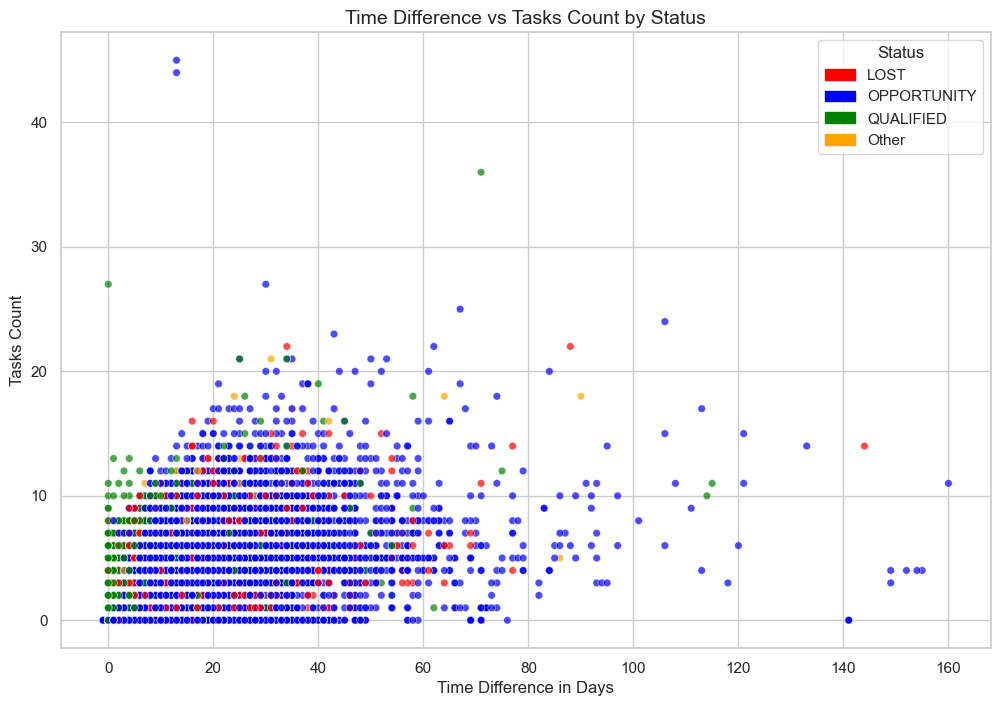

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # Make sure patches are imported

# I'm assuming you have a column named 'notes' in your dataframe.
# If the column has a different name, replace 'notes' with the correct column name.

# Create a new column for plotting colors based on 'first_status_except_created_or_contacted'
def status_color(status):
    if status == 'LOST':
        return 'red'
    elif status == 'OPPORTUNITY':
        return 'blue'
    elif status == 'QUALIFIED':
        return 'green'
    else:
        return 'orange'  # Combine the rest into 'Other'

df_lead['plot_color'] = df_lead['first_status_except_created_or_contacted'].apply(status_color)

# Plotting setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot
sns.scatterplot(data=df_lead, x='time_diff_in_days', y='total_tasks', hue='plot_color', palette=['red', 'blue', 'green', 'orange'], s=30, alpha=0.7)

# Customizing the legend manually
plt.legend(handles=[mpatches.Patch(color='red', label='LOST'),
                    mpatches.Patch(color='blue', label='OPPORTUNITY'),
                    mpatches.Patch(color='green', label='QUALIFIED'),
                    mpatches.Patch(color='orange', label='Other')], title='Status')

plt.xlabel('Time Difference in Days', fontsize=12)
plt.ylabel('Tasks Count', fontsize=12)
plt.title('Time Difference vs Tasks Count by Status', fontsize=14)

plt.show()


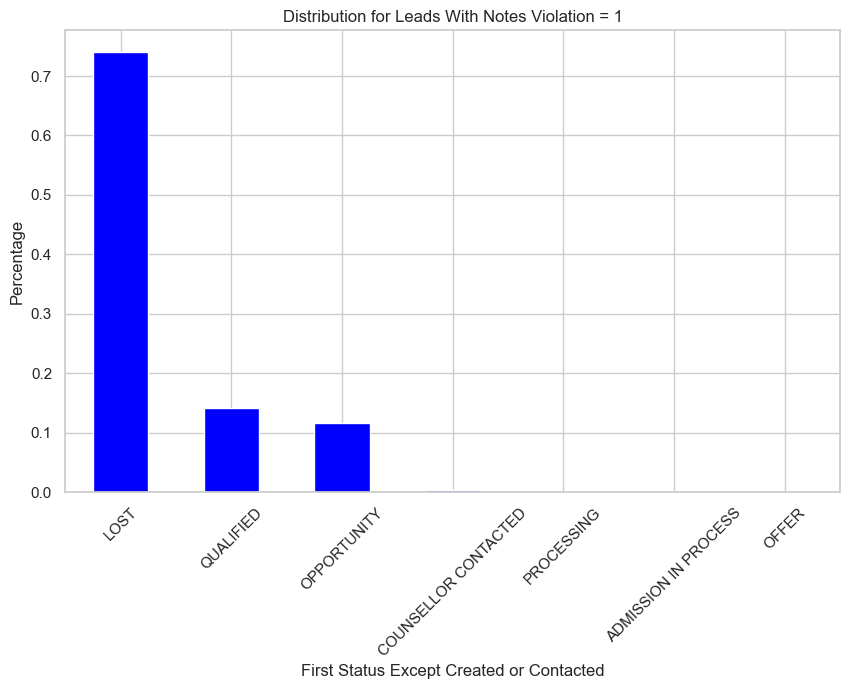

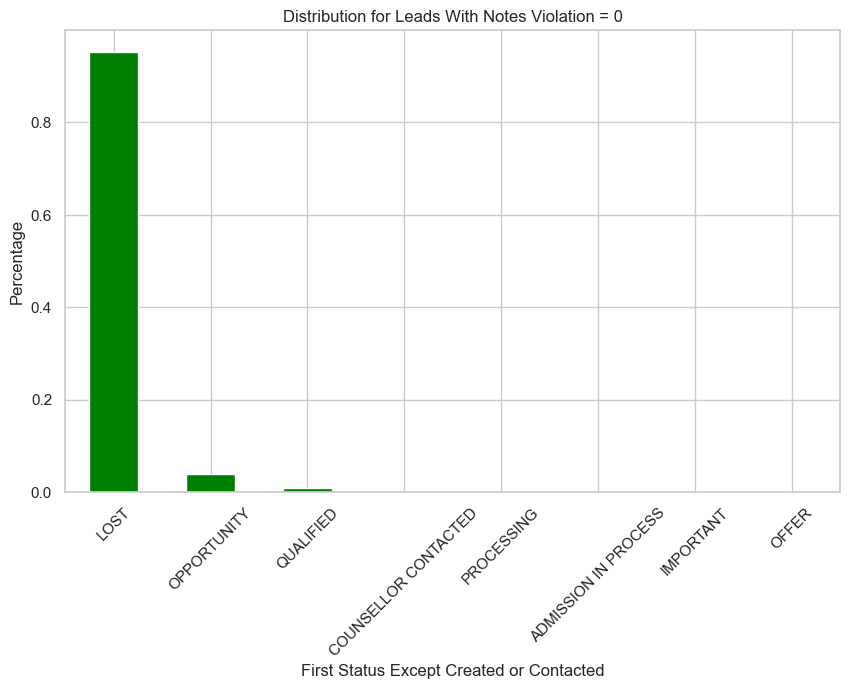

In [661]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Calculate distributions as in previous steps, if not already done
distribution_violation_1 = df_lead[df_lead['notes_violation'] == 1]['first_status_except_created_or_contacted'].value_counts(normalize=True).reset_index()
distribution_violation_0 = df_lead[df_lead['notes_violation'] == 0]['first_status_except_created_or_contacted'].value_counts(normalize=True).reset_index()

# Prepare the DataFrame for plotting
distribution_violation_1['violation'] = 'With Violation'
distribution_violation_0['violation'] = 'Without Violation'
combined_distribution = pd.concat([distribution_violation_1, distribution_violation_0], axis=0)
combined_distribution.columns = ['Status', 'Percentage', 'Violation']

# Plot for leads with notes_violation = 1
plt.figure(figsize=(10, 6))
distribution_violation_1 = df_lead[df_lead['notes_violation'] == 1]['first_status_except_created_or_contacted'].value_counts(normalize=True)
distribution_violation_1.plot(kind='bar', color='blue')
plt.title('Distribution for Leads With Notes Violation = 1')
plt.ylabel('Percentage')
plt.xlabel('First Status Except Created or Contacted')
plt.xticks(rotation=45)
plt.show()

# Plot for leads with notes_violation = 0
plt.figure(figsize=(10, 6))
distribution_violation_0 = df_lead[df_lead['notes_violation'] == 0]['first_status_except_created_or_contacted'].value_counts(normalize=True)
distribution_violation_0.plot(kind='bar', color='green')
plt.title('Distribution for Leads With Notes Violation = 0')
plt.ylabel('Percentage')
plt.xlabel('First Status Except Created or Contacted')
plt.xticks(rotation=45)
plt.show()


In [76]:
# Replace 'Referral' with 'referral'
df_lead['utm_source'] = df_lead['utm_source'].replace({'Referral': 'referral'})

In [77]:
df_lead

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date,note_date_diff,task_date_diff
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0.0,100.0,0,0.0,0,1,2023-03-01,NaT,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149494,181261,2023-07-21 12:22:45.586146,DEPOSIT,Sharmishtha Chikhalkar,Mumbai - HO,QUALIFIED,2023-07-21 14:34:53.590722,google,2023-07-21T20:04:53.590722,src-generic-degree-masters-tg-uk-geo-mumbai,...,0.0,200.0,0,0.0,1,0,2023-07-21,2023-07-21,0.0,0.0
149495,380522,2024-03-17 03:55:34.148745,CONTACTED,Hardik Kamdar,Mumbai - HO,NaN,NaT,google,NaN,dsp-remarketing-tg-all-geo-in,...,0.0,NaN,0,0.0,0,0,NaT,NaT,NaN,NaN
149496,380423,2024-03-16 19:20:31.595955,LOST,Hardik Kamdar,Hyderabad,LOST,2024-03-20 10:40:57.331616,google,NaN,src-generic-core-tg-uk-geo-hyderabad-wan,...,0.0,0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
149497,379556,2024-03-15 09:12:43.098012,CONTACTED,Sara Solkar,Hyderabad,NaN,NaT,google,NaN,src-competitors-geo-tg-all-geo-in,...,0.0,NaN,0,0.0,0,0,NaT,NaT,NaN,NaN


In [78]:
# Convert 'created_at' to datetime
df_lead['lead_created_at'] = pd.to_datetime(df_lead['lead_created_at'], format='%d/%m/%y %H:%M')

# Extract the year and month from 'created_at'
df_lead['year_month'] = df_lead['lead_created_at'].dt.to_period('M')

# Group by 'utm_source' and 'year_month', then count the number of leads
monthly_counts = df_lead.groupby(['utm_source', 'year_month']).size().reset_index(name='count')

In [79]:
monthly_counts

,utm_source,year_month,count
0,Call,2023-03,7
1,CampusAmbassador,2023-09,6
2,Direct,2023-03,7
3,Facebook,2023-04,1
4,Google,2023-03,1
...,...,...,...
296,youtube,2024-02,4
297,yt-video?utm_medium=organic?utm=campaign=appli...,2024-02,1
298,yt-video?utm_medium=organic?utm=campaign=study...,2023-05,1
299,yt-video?utm_medium=organic?utm=campaign=study...,2023-08,1


In [80]:
# Assuming df_new_lead is your DataFrame

# Group by 'utm_source' and 'first_status_except_created_or_contacted', then count the occurrences
utm_distribution = df_lead.groupby(['utm_source', 'first_status_except_created_or_contacted']).size().reset_index(name='count')

# Sort the results by 'utm_source' and 'count' to find the top 20 'utm_source' entries
utm_distribution_sorted = utm_distribution.sort_values(['utm_source', 'count'], ascending=[True, False])

# Now, to get the top 20 utm_source entries based on overall counts (regardless of status), we need to aggregate first
utm_source_counts = df_lead['utm_source'].value_counts().head(20).index.tolist()

# Filter the sorted distribution for only the top 20 utm_source entries
top_utm_distribution = utm_distribution_sorted[utm_distribution_sorted['utm_source'].isin(utm_source_counts)]

# Since the data provided is quite small and might not include 20 unique utm_source entries,
# the above steps ensure we're prepared to handle larger datasets with more utm_source values.
# Display the filtered distribution
print(top_utm_distribution)


    utm_source first_status_except_created_or_contacted  count
19   affiliate                                     LOST    576
20   affiliate                              OPPORTUNITY      8
21   affiliate                                QUALIFIED      8
24        bing                                     LOST   3132
25        bing                              OPPORTUNITY    515
..         ...                                      ...    ...
146    walk-in                               PROCESSING      2
143    walk-in                     COUNSELLOR CONTACTED      1
148   whatsapp                                     LOST    101
150   whatsapp                                QUALIFIED     18
149   whatsapp                              OPPORTUNITY     15

[86 rows x 3 columns]


<Figure size 2000x1000 with 0 Axes>

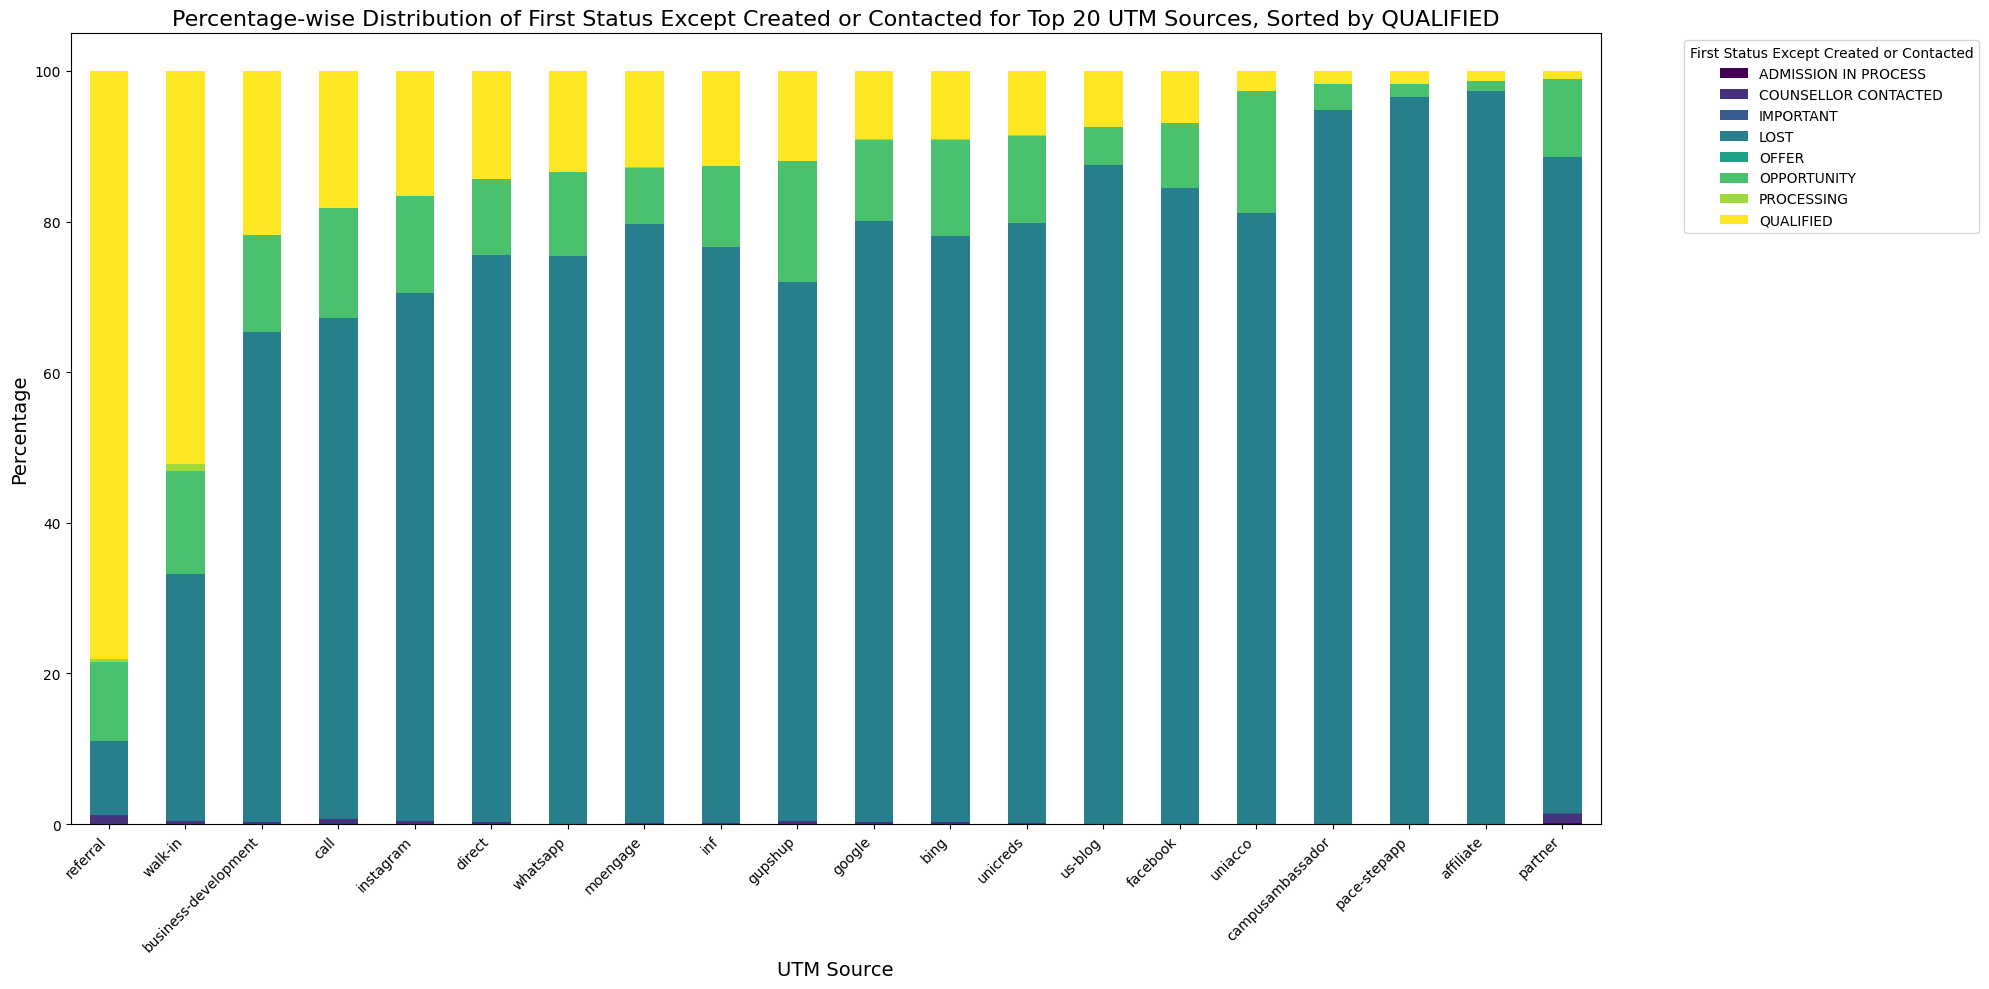

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming all previous steps have been correctly executed and df_new_lead is your DataFrame

# Calculate the percentage-wise distribution for 'first_status_except_created_or_contacted' within each utm_source again to ensure we're up to date
distribution = df_lead.groupby('utm_source')['first_status_except_created_or_contacted'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Get the top 20 utm_sources by their total count
utm_source_counts = df_lead['utm_source'].value_counts()
top_utm_sources = utm_source_counts.head(20).index

# Filter the distribution to only include these top 20 utm_sources
top_distribution = distribution.loc[top_utm_sources]

# BEFORE PLOTTING: Sort top_distribution by 'QUALIFIED', if it exists
if 'QUALIFIED' in top_distribution.columns:
    # Extract the 'QUALIFIED' column for sorting
    qualified_percentages = top_distribution['QUALIFIED'].copy()
    
    # Sort the top_utm_sources by 'QUALIFIED' in descending order
    sorted_top_utm_sources = qualified_percentages.sort_values(ascending=False).index
    
    # Re-order top_distribution using the sorted indices
    top_distribution = top_distribution.loc[sorted_top_utm_sources]

# Plotting with the sorted distribution
plt.figure(figsize=(20, 10))  # Adjust the size as necessary to fit all labels
top_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(20, 10))

# Enhancing the plot
plt.title('Percentage-wise Distribution of First Status Except Created or Contacted for Top 20 UTM Sources, Sorted by QUALIFIED', fontsize=16)
plt.xlabel('UTM Source', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility
plt.legend(title='First Status Except Created or Contacted', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

# Make sure everything is visible
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

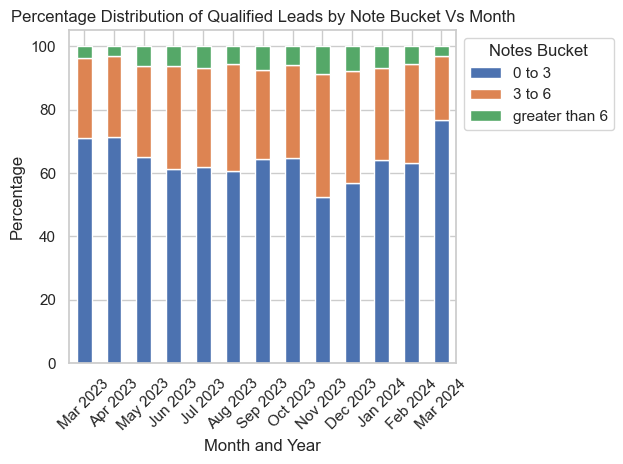

In [308]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_lead is your full dataframe.

# Filter dataframe where is_qualified == 1
df_qualified = df_lead[df_lead['is_qualified'] == 1].copy()

# Convert 'created_at' to datetime if it's not already
df_qualified['lead_created_at'] = pd.to_datetime(df_qualified['lead_created_at'])

# Extract month_year from 'created_at'
df_qualified['month_year'] = df_qualified['lead_created_at'].dt.to_period('M')

# Categorize 'time_diff_in_days' into groups
df_qualified['notes_category'] = pd.cut(df_qualified['notes_count'], 
                                            bins=[-1, 3, 6, float('inf')], 
                                            labels=['0 to 3', '3 to 6', 'greater than 6'])

# Calculate percentage distribution for each category per month_year
distribution = df_qualified.groupby(['month_year', 'notes_category']).size().unstack(fill_value=0)
distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
distribution_percentage.plot(kind='bar', stacked=True)

plt.xticks(ticks=range(len(distribution_percentage.index)), labels=distribution_percentage.index.strftime('%b %Y'), rotation=45)

plt.xlabel('Month and Year')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Qualified Leads by Note Bucket Vs Month')

# Adjusting the legend's position
plt.legend(title='Notes Bucket', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()


In [158]:
df_lead.head()

,lead_id,created_at,status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,created_at_date,first_status_except_created_or_contacted_date_only,time_diff_in_days,...,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost
0,104444,2023-03-01 00:35:00,LOST,Nipun Saigal,NaN,LOST,2023-03-01 07:44:00,2023-03-01,2023-03-01,0,...,0,0,0.0,0.0,0.0,0.000000,0,0.0,0,1
1,104459,2023-03-01 01:48:00,LOST,Mufida Loladiya,NaN,OPPORTUNITY,2023-03-02 11:59:00,2023-03-01,2023-03-02,1,...,1,0,0.0,0.0,0.0,100.000000,1,0.0,0,1
2,104466,2023-03-01 02:16:00,LOST,Sparsh Shetty,NaN,LOST,2023-03-08 06:45:00,2023-03-01,2023-03-08,7,...,2,1,0.0,0.0,0.0,42.857143,0,50.0,0,1
3,104468,2023-03-01 02:32:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:10:00,2023-03-01,2023-03-01,0,...,0,0,0.0,0.0,0.0,100.000000,1,0.0,0,1
4,104447,2023-03-01 00:46:00,LOST,Mufida Loladiya,Hyderabad,LOST,2023-03-10 10:25:00,2023-03-01,2023-03-10,9,...,4,1,0.0,0.0,0.0,22.222222,0,25.0,0,1


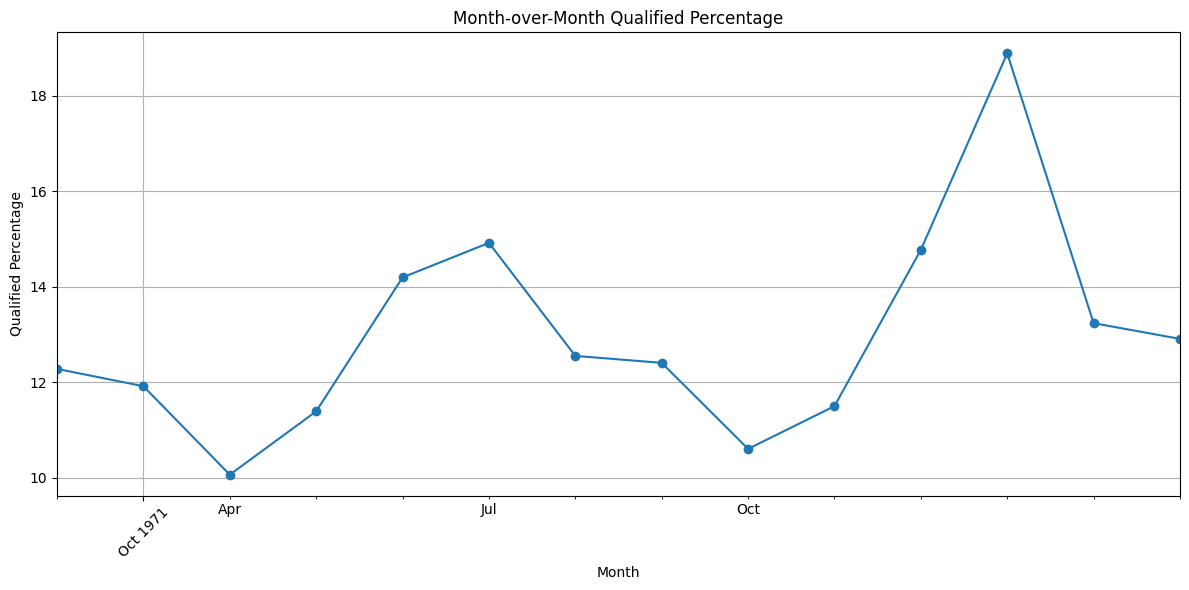

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Ensure 'created_at' is a datetime object
df_lead['lead_created_at'] = pd.to_datetime(df_lead['lead_created_at'])

df_lead_filtered = df_lead[df_lead['lqt_agent'] != 'Squad Stack'].copy()

# Extract month from 'created_at' to a new column for grouping
df_lead_filtered['month'] = df_lead_filtered['lead_created_at'].dt.to_period('M')

# Group by the new 'month' column and calculate the required statistics
monthly_data = df_lead_filtered.groupby('month').agg(
    total_leads=('lead_id', 'count'),        # Count total leads per month
    qualified_leads=('is_qualified', 'sum')  # Sum the 'is_qualified' column to get number of qualified leads
)

# Calculate the qualified percentage
monthly_data['qualified_percentage'] = (monthly_data['qualified_leads'] / monthly_data['total_leads']) * 100

# Convert the PeriodIndex to DateTimeIndex for plotting
monthly_data.index = monthly_data.index.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))
monthly_data['qualified_percentage'].plot(kind='line', marker='o')

# Formatting the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Qualified Percentage')
plt.title('Month-over-Month Qualified Percentage')
plt.grid(True)
plt.tight_layout()
plt.show()


In [155]:
monthly_data.to_clipboard()

In [50]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,total_tasks,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0,0,0.0,0.0,0.0,NaN,0,0.0,0,1
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0,0,0.0,0.0,0.0,NaN,0,0.0,0,1
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0,0,0.0,0.0,0.0,NaN,0,0.0,0,1
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0,0,0.0,0.0,0.0,NaN,0,0.0,0,1
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0,0,0.0,0.0,0.0,100.0,0,0.0,0,1


In [39]:
df_note.tail()

,id,note,is_deleted,created_by_id,created_at,lead_id,updated_at,is_system_generated,remind_at,format,created_at_date,updated_at_date,remind_at_date
975032,1422452,Data science \n3 Backlog need to be cleared \n...,0,17072.0,2024-03-11 11:26:51.302094,330112,2024-03-13 09:49:28.873158,0,NaT,TEXT,2024-03-11,2024-03-13,NaT
975033,1411121,DNP/WA sent.,0,11980.0,2024-03-06 10:37:36.143357,327683,2024-03-13 10:12:39.063745,0,NaT,TEXT,2024-03-06,2024-03-13,NaT
975034,1422465,"Spoke with the lead, he has completed b.tech i...",0,17648.0,2024-03-11 11:28:23.175035,377331,2024-03-13 10:18:38.705727,0,NaT,TEXT,2024-03-11,2024-03-13,NaT
975035,1415271,call tommorow at 11.30,0,11981.0,2024-03-07 12:04:17.956689,327554,2024-03-13 10:42:42.673341,0,NaT,TEXT,2024-03-07,2024-03-13,NaT
975036,1408840,DNP/WA sent.,0,11980.0,2024-03-05 13:42:42.712025,331098,2024-03-13 11:00:34.315738,0,NaT,TEXT,2024-03-05,2024-03-13,NaT


In [55]:


# Merge df_lead with df_note on lead_id
merged_df = pd.merge(df_lead, df_note, how='left', left_on='lead_id', right_on='lead_id')

# # Filter notes that are within the lead_created_at and first_status_except_created_or_contacted_date range
filtered_notes = merged_df[(merged_df['created_at_date_y'] >= merged_df['created_at_date_x']) & 
                           (merged_df['created_at_date_y'] <= merged_df['first_status_except_created_or_contacted_date'])]

# Group by lead_id and find the earliest created_at date for the notes
earliest_notes = filtered_notes.groupby('lead_id')['created_at_date_y'].min().reset_index()
earliest_notes.rename(columns={'created_at_date_y': 'earliest_note_date'}, inplace=True)

# Merge the earliest_note_date back into df_lead
df_lead = pd.merge(df_lead, earliest_notes, on='lead_id', how='left')

# Now, df_lead includes the earliest_note_date for each lead where applicable


In [57]:
df_lead.head(10)

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0,0.0,0.0,0.0,100.000000,0,0.0,0,1,2023-03-01
5,104482,2023-03-01 03:25:59.046400,LOST,Mufida Loladiya,Hyderabad,LOST,2023-03-02 06:29:37.787814,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,0,0.0,0.0,0.0,100.000000,0,0.0,0,1,2023-03-02
6,104501,2023-03-01 04:21:27.747301,LOST,Mufida Loladiya,NaN,LOST,2023-03-02 13:41:24.441021,google,NaN,src-generic-core-tg-canada-geo-hyderabad,...,0,0.0,0.0,0.0,300.000000,0,0.0,0,1,2023-03-02
7,104513,2023-03-01 05:00:28.431731,LOST,Mufida Loladiya,NaN,LOST,2023-03-08 10:04:19.258348,google,NaN,src-generic-core-city-tg-uk-geo-mumbai,...,1,0.0,0.0,0.0,42.857143,1,50.0,0,1,2023-03-02
8,104527,2023-03-01 05:32:27.809924,LOST,Faraz Ebji,NaN,LOST,2023-03-11 08:26:02.124185,unicreds,NaN,NaN,...,0,0.0,0.0,0.0,50.000000,0,0.0,0,1,2023-03-04
9,104542,2023-03-01 06:09:18.381776,LOST,Dhruvi Kakadia,NaN,LOST,2023-03-04 09:53:54.999208,google,NaN,src-generic-degree-masters-courses-tg-all-geo-...,...,0,0.0,0.0,0.0,66.666667,0,0.0,0,1,2023-03-02


In [58]:
df_notes_filtered = df_note[df_note['lead_id'] ==  104456]


In [59]:
df_notes_filtered

,id,note,is_deleted,created_by_id,created_at,lead_id,updated_at,is_system_generated,remind_at,format,created_at_date,updated_at_date,remind_at_date
177,452907,only planning for PHD program,0,4777.0,2023-03-01 07:11:54.566066,104456,2023-03-01 07:11:54.566108,0,NaT,TEXT,2023-03-01,2023-03-01,NaT


In [63]:

# Merge df_lead with df_note on lead_id
merged_df = pd.merge(df_lead, df_task, how='left', left_on='lead_id', right_on='lead_id')

# Filter notes that are within the lead_created_at and first_status_except_created_or_contacted_date range
filtered_tasks = merged_df[(merged_df['created_at_date_y'] >= merged_df['created_at_date_x']) & 
                           (merged_df['created_at_date_y'] <= merged_df['first_status_except_created_or_contacted_date'])]

# Group by lead_id and find the earliest created_at date for the notes
earliest_tasks = filtered_tasks.groupby('lead_id')['created_at_date_y'].min().reset_index()
earliest_tasks.rename(columns={'created_at_date_y': 'earliest_task_date'}, inplace=True)

# Merge the earliest_note_date back into df_lead
df_lead = pd.merge(df_lead, earliest_tasks, on='lead_id', how='left')

# Now, df_lead includes the earliest_note_date for each lead where applicable


In [68]:
df_lead.head(10)

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0.0,0.0,0.0,100.000000,0,0.0,0,1,2023-03-01,NaN
5,104482,2023-03-01 03:25:59.046400,LOST,Mufida Loladiya,Hyderabad,LOST,2023-03-02 06:29:37.787814,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,0.0,0.0,0.0,100.000000,0,0.0,0,1,2023-03-02,NaN
6,104501,2023-03-01 04:21:27.747301,LOST,Mufida Loladiya,NaN,LOST,2023-03-02 13:41:24.441021,google,NaN,src-generic-core-tg-canada-geo-hyderabad,...,0.0,0.0,0.0,300.000000,0,0.0,0,1,2023-03-02,2023-03-02
7,104513,2023-03-01 05:00:28.431731,LOST,Mufida Loladiya,NaN,LOST,2023-03-08 10:04:19.258348,google,NaN,src-generic-core-city-tg-uk-geo-mumbai,...,0.0,0.0,0.0,42.857143,1,50.0,0,1,2023-03-02,2023-03-02
8,104527,2023-03-01 05:32:27.809924,LOST,Faraz Ebji,NaN,LOST,2023-03-11 08:26:02.124185,unicreds,NaN,NaN,...,0.0,0.0,0.0,50.000000,0,0.0,0,1,2023-03-04,2023-03-04
9,104542,2023-03-01 06:09:18.381776,LOST,Dhruvi Kakadia,NaN,LOST,2023-03-04 09:53:54.999208,google,NaN,src-generic-degree-masters-courses-tg-all-geo-...,...,0.0,0.0,0.0,66.666667,0,0.0,0,1,2023-03-02,2023-03-02


In [69]:
df_tasks_filtered = df_task[df_task['lead_id'] ==  104501]

In [70]:
df_tasks_filtered

,id,summary,remind_at,is_complete,is_deleted,created_at,updated_at,created_by_id,lead_id,created_by_system,completed_by_system,metadata,summary_hash,created_at_date,updated_at_date,remind_at_date
11751,376534,FOLLOW UP 2,2023-03-04 13:31:00,1,0,2023-03-02 13:31:19.006419,2023-03-02 13:41:33.344635,6747,104501,0,0,{},NaN,2023-03-02,2023-03-02,2023-03-04


In [67]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0.0,0.0,0.0,NaN,0,0.0,0,1,NaN,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0.0,0.0,0.0,100.0,0,0.0,0,1,2023-03-01,NaN


In [400]:
df_campaign = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/campaign_mapping.csv")

In [401]:
df_campaign

,Campaign Name,Campaign Type,Sub Category,Campaign Country,Campaign Location
0,src-generic-core-city-tg-new-zealand-geo-banga...,Search,City,New-Zealand,Bangalore
1,src-generic-core-city-tg-australia-geo-bangalore,Search,City,Australia,Bangalore
2,src-generic-core-tg-ireland-geo-bangalore,Search,Core,Ireland,Bangalore
3,src-generic-core-tg-australia-geo-bangalore,Search,Core,Australia,Bangalore
4,src-generic-core-tg-canada-geo-bangalore,Search,Core,Canada,Bangalore
...,...,...,...,...,...
429,video-vac-yt-promotion-tg-uk-geo-in,Video,YouTube,UK,india
430,dsp-traffic-tg-all-geo-in,Display,Traffic,all,india
431,video-vac-yt-promotion-tg-usa-geo-in,Video,YouTube,USA,india
432,src-generic-core-tg-uk-geo-bangalore-wan,Search,Core,UK,bangalore-wan


In [71]:
# Merge the DataFrames
df_lead = pd.merge(df_lead, df_campaign, left_on='utm_campaign', right_on='Campaign Name', how='left')

NameError: name 'df_campaign' is not defined

In [403]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,Campaign Name_x,Campaign Type_x,Sub Category_x,Country,Campaign Location_x,Campaign Name_y,Campaign Type_y,Sub Category_y,Campaign Country,Campaign Location_y
0,104364,2023-03-01 00:13:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-11 08:36:00,unicreds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,104396,2023-03-01 01:06:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:57:00,unicreds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,104405,2023-03-01 01:36:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:58:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,Hyderabad,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,Hyderabad
3,104405,2023-03-01 01:36:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:58:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,Hyderabad,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,hyderabad
4,104405,2023-03-01 01:36:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:58:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,hyderabad,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,Hyderabad


In [405]:
filtered_df_camp = df_lead[pd.isnull(df_lead['Campaign Name_x']) & pd.notnull(df_lead['utm_campaign'])]


In [406]:
filtered_df_camp

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,Campaign Name_x,Campaign Type_x,Sub Category_x,Country,Campaign Location_x,Campaign Name_y,Campaign Type_y,Sub Category_y,Campaign Country,Campaign Location_y
370,105844,2023-03-02 21:39:00,LOST,Ronak Dikav,NaN,OPPORTUNITY,2023-03-09 10:33:00,sendinblue,NaN,newsletter-feb-2023-study-in-austarlia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,105520,2023-03-02 14:20:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-02 10:42:00,unicreds,NaN,top-nav,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,104875,2023-03-01 20:27:00,LOST,Nipun Saigal,NaN,LOST,2023-03-08 09:07:00,google,NaN,src-generic-scholarship-tg-uk-geo-hyderabad-wan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613,107473,2023-03-05 00:08:00,LOST,Rutuja More,NaN,LOST,2023-03-06 06:45:00,facebook,NaN,fb-leadgen-webcon-uk-geo-mumbai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,110609,2023-03-09 06:47:00,LOST,Densy Ukkan,Mumbai - HO,LOST,2023-03-09 15:11:00,us-blog,NaN,scholarship-side-image,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394310,332331,2024-02-23 19:54:00,LOST,Sharmishtha Chikhalkar,Mumbai - HO,LOST,2024-03-11 12:36:00,inf,NaN,insta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394389,339837,2024-03-07 17:17:00,CONTACTED,Shreeya Dalvi,Delhi,NaN,NaT,inf,NaN,youtube,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394420,380024,2024-03-16 11:10:00,LOST,Dummy User,Mumbai - HO,LOST,2024-03-16 05:46:00,us-blog,NaN,get-free-counselling-static-bar-mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394434,380232,2024-03-16 17:04:00,LOST,Dummy User,Mumbai - HO,LOST,2024-03-16 11:40:00,us-blog,NaN,start-your-application-incontent-lead-magnet-d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
filtered_df_new = df_lead[pd.notnull(df_lead['utm_campaign'])]

In [408]:
filtered_df_camp

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,Campaign Name_x,Campaign Type_x,Sub Category_x,Country,Campaign Location_x,Campaign Name_y,Campaign Type_y,Sub Category_y,Campaign Country,Campaign Location_y
370,105844,2023-03-02 21:39:00,LOST,Ronak Dikav,NaN,OPPORTUNITY,2023-03-09 10:33:00,sendinblue,NaN,newsletter-feb-2023-study-in-austarlia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,105520,2023-03-02 14:20:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-02 10:42:00,unicreds,NaN,top-nav,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,104875,2023-03-01 20:27:00,LOST,Nipun Saigal,NaN,LOST,2023-03-08 09:07:00,google,NaN,src-generic-scholarship-tg-uk-geo-hyderabad-wan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613,107473,2023-03-05 00:08:00,LOST,Rutuja More,NaN,LOST,2023-03-06 06:45:00,facebook,NaN,fb-leadgen-webcon-uk-geo-mumbai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,110609,2023-03-09 06:47:00,LOST,Densy Ukkan,Mumbai - HO,LOST,2023-03-09 15:11:00,us-blog,NaN,scholarship-side-image,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394310,332331,2024-02-23 19:54:00,LOST,Sharmishtha Chikhalkar,Mumbai - HO,LOST,2024-03-11 12:36:00,inf,NaN,insta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394389,339837,2024-03-07 17:17:00,CONTACTED,Shreeya Dalvi,Delhi,NaN,NaT,inf,NaN,youtube,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394420,380024,2024-03-16 11:10:00,LOST,Dummy User,Mumbai - HO,LOST,2024-03-16 05:46:00,us-blog,NaN,get-free-counselling-static-bar-mobile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394434,380232,2024-03-16 17:04:00,LOST,Dummy User,Mumbai - HO,LOST,2024-03-16 11:40:00,us-blog,NaN,start-your-application-incontent-lead-magnet-d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [517]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date
0,104364,2023-03-01 00:13:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-11 08:36:00,unicreds,NaN,NaN,...,0.0,0.0,0.0,30.000000,1,50.000000,0,1,2023-03-01 10:34:03.206224,2023-03-01 10:34:16.390065
1,104396,2023-03-01 01:06:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:57:00,unicreds,NaN,NaN,...,0.0,0.0,0.0,100.000000,0,0.000000,0,1,2023-03-01 14:20:00.656472,2023-03-01 14:22:26.343185
2,104405,2023-03-01 01:36:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:58:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,0.0,0.0,0.0,100.000000,0,0.000000,0,1,2023-03-01 14:35:18.287617,2023-03-01 14:35:45.324839
3,104411,2023-03-01 02:05:00,LOST,Dhruvi Kakadia,NaN,LOST,2023-03-09 11:52:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad-wan,...,0.0,0.0,0.0,37.500000,1,100.000000,0,1,2023-03-01 15:39:49.505448,2023-03-01 15:40:07.016096
4,104416,2023-03-01 02:30:00,LOST,Diana Fernandes,NaN,OPPORTUNITY,2023-03-08 14:19:00,google,NaN,src-generic-core-tg-uk-geo-mumbai,...,0.0,0.0,0.0,42.857143,1,33.333333,0,1,2023-03-02 10:55:11.286367,2023-03-02 10:55:20.141129


In [469]:
df_lead = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/final_report_metrics.csv")

In [585]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,tasks_violated,free_time_tasks_count,free_time_median_days_count,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,is_qualified,is_lost,earliest_note_date,earliest_task_date
0,104364,2023-03-01 00:13:00,LOST,Maria Bagdadi,NaN,LOST,2023-03-11 08:36:00,unicreds,NaN,NaN,...,1,0.0,0.0,0.0,30.000000,1,0,1,2023-03-01 10:34:03.206224,2023-03-01 10:34:16.390065
1,104396,2023-03-01 01:06:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:57:00,unicreds,NaN,NaN,...,0,0.0,0.0,0.0,100.000000,0,0,1,2023-03-01 14:20:00.656472,2023-03-01 14:22:26.343185
2,104405,2023-03-01 01:36:00,LOST,Nipun Saigal,NaN,LOST,2023-03-04 08:58:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad,...,0,0.0,0.0,0.0,100.000000,0,0,1,2023-03-01 14:35:18.287617,2023-03-01 14:35:45.324839
3,104411,2023-03-01 02:05:00,LOST,Dhruvi Kakadia,NaN,LOST,2023-03-09 11:52:00,google,NaN,src-generic-course-level-tg-uk-geo-hyderabad-wan,...,2,0.0,0.0,0.0,37.500000,1,0,1,2023-03-01 15:39:49.505448,2023-03-01 15:40:07.016096
4,104416,2023-03-01 02:30:00,LOST,Diana Fernandes,NaN,OPPORTUNITY,2023-03-08 14:19:00,google,NaN,src-generic-core-tg-uk-geo-mumbai,...,1,0.0,0.0,0.0,42.857143,1,0,1,2023-03-02 10:55:11.286367,2023-03-02 10:55:20.141129


In [73]:
import pandas as pd

# Assuming df_lead is your DataFrame

# Convert the relevant columns to datetime format
# df_lead['lead_created_at'] = pd.to_datetime(df_lead['lead_created_at'])
df_lead['earliest_note_date'] = pd.to_datetime(df_lead['earliest_note_date'])
df_lead['earliest_task_date'] = pd.to_datetime(df_lead['earliest_task_date'])

# Calculate the difference in days and round to the nearest whole number
df_lead["note_date_diff"] = (df_lead["earliest_note_date"] - df_lead["created_at_date"]).dt.days
df_lead["task_date_diff"] = (df_lead["earliest_task_date"] - df_lead["created_at_date"]).dt.days


# The new columns 'diff_days_note' and 'diff_days_task' now contain the differences in days


In [74]:
df_lead.head()

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date,note_date_diff,task_date_diff
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,0.0,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,0.0,100.0,0,0.0,0,1,2023-03-01,NaT,0.0,NaN


In [75]:
df_lead.to_csv("final_lqt_metric.csv", index=True)

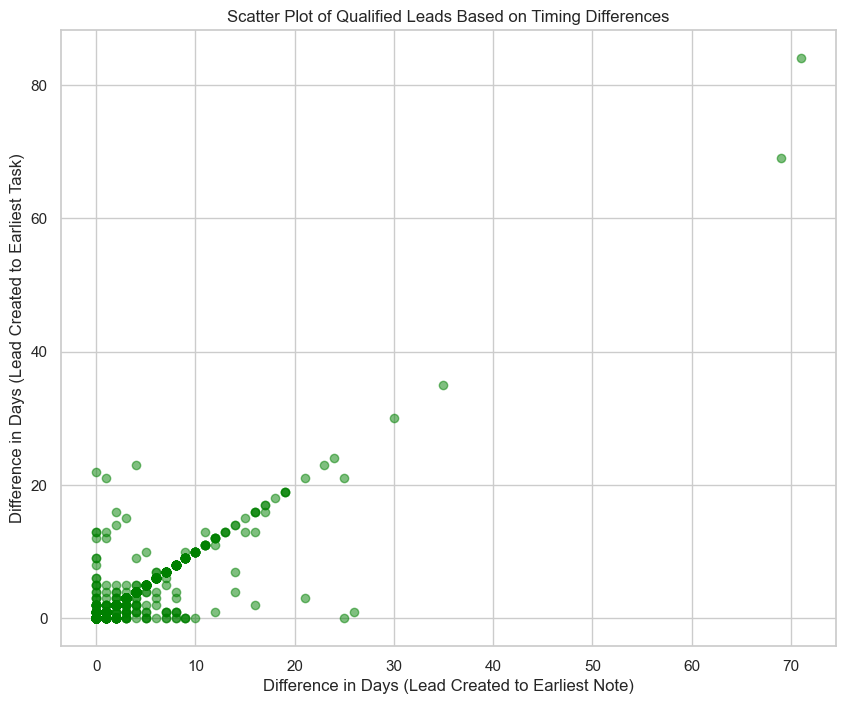

In [523]:
import matplotlib.pyplot as plt

# Filter qualified leads
qualified_leads = df_lead[df_lead['is_qualified'] == 1]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(qualified_leads['note_date_diff'], qualified_leads['task_date_diff'], color='green', alpha=0.5)
plt.xlabel('Difference in Days (Lead Created to Earliest Note)')
plt.ylabel('Difference in Days (Lead Created to Earliest Task)')
plt.title('Scatter Plot of Qualified Leads Based on Timing Differences')
plt.grid(True)
plt.show()


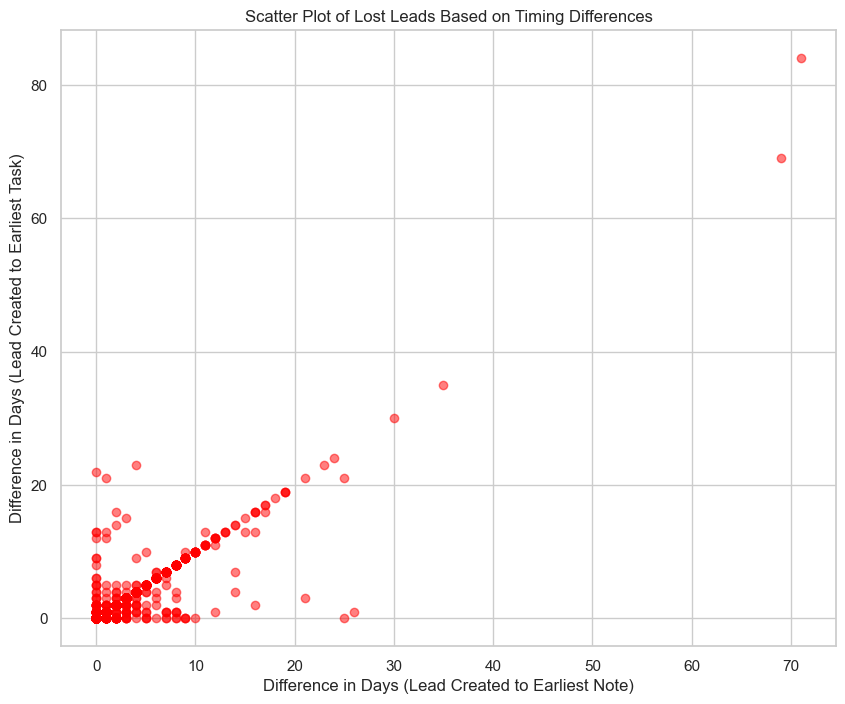

In [524]:
import matplotlib.pyplot as plt

# Filter qualified leads
lost_leads = df_lead[df_lead['is_lost'] == 1]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(qualified_leads['note_date_diff'], qualified_leads['task_date_diff'], color='red', alpha=0.5)
plt.xlabel('Difference in Days (Lead Created to Earliest Note)')
plt.ylabel('Difference in Days (Lead Created to Earliest Task)')
plt.title('Scatter Plot of Lost Leads Based on Timing Differences')
plt.grid(True)
plt.show()


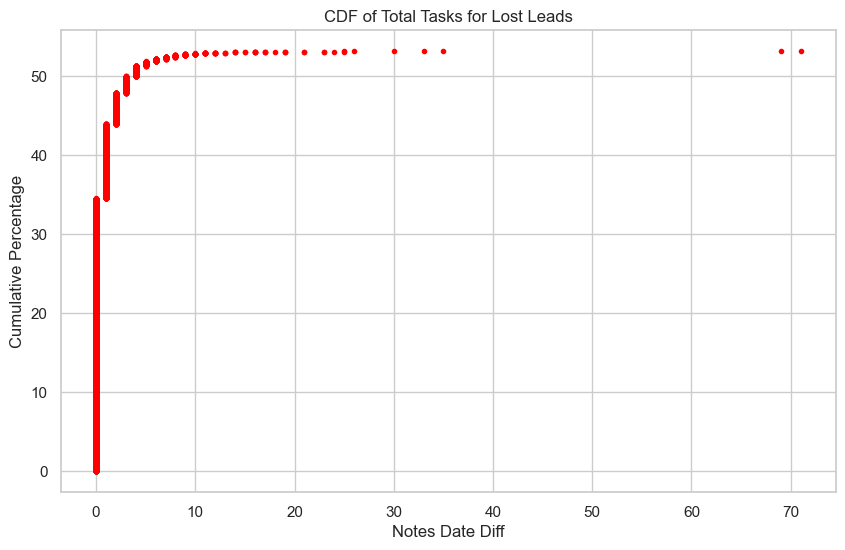

In [530]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_lead is your DataFrame and it's already been loaded correctly

# Filter the DataFrame for lost leads
qualified_leads_df_notes = df_lead[df_lead['is_qualified'] == 1]

# Sort the DataFrame by 'note_date_diff' to prepare for CDF calculation
sorted_note_date_diff = qualified_leads_df_notes.sort_values(by='note_date_diff')

# Calculate the CDF values for lost leads
cdf_values = np.arange(1, len(sorted_note_date_diff) + 1) / len(sorted_note_date_diff) * 100

# Plotting CDF for lost leads
plt.figure(figsize=(10, 6))
plt.plot(sorted_note_date_diff['note_date_diff'], cdf_values, marker='.', linestyle='none', color='red')
plt.xlabel('Notes Date Diff')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Total Tasks for Lost Leads')
plt.grid(True)
plt.show()


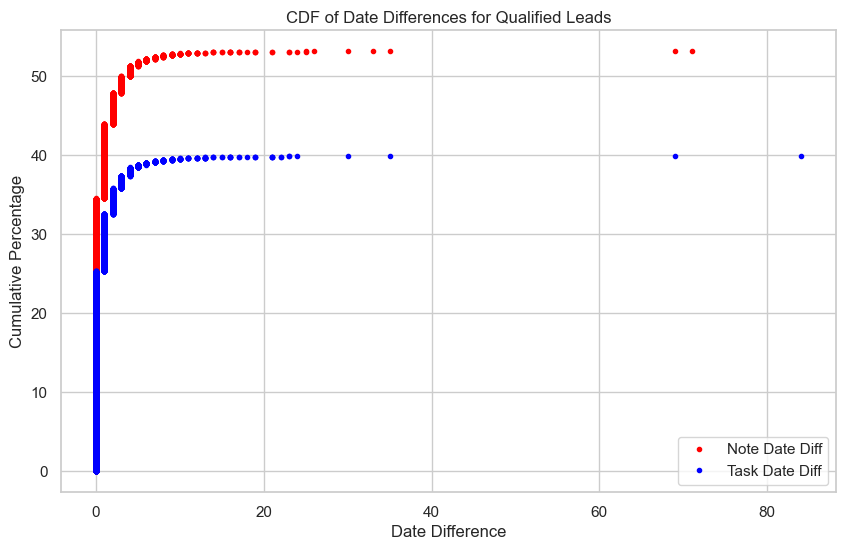

In [531]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Your DataFrame is assumed to be named df_lead
# Make sure to execute the following line if you're not already importing pandas
# df_lead = pd.read_csv('path_to_your_csv_file.csv')

# Filter the DataFrame for qualified leads
qualified_leads_df = df_lead[df_lead['is_qualified'] == 1]

# Sort the DataFrame by 'note_date_diff' to prepare for CDF calculation
sorted_note_date_diff = qualified_leads_df.sort_values(by='note_date_diff')

# Sort the DataFrame by 'task_date_diff' to prepare for CDF calculation
sorted_task_date_diff = qualified_leads_df.sort_values(by='task_date_diff')

# Calculate the CDF values for 'note_date_diff'
cdf_note_date_diff = np.arange(1, len(sorted_note_date_diff) + 1) / len(sorted_note_date_diff) * 100

# Calculate the CDF values for 'task_date_diff'
cdf_task_date_diff = np.arange(1, len(sorted_task_date_diff) + 1) / len(sorted_task_date_diff) * 100

# Plotting CDF for 'note_date_diff' and 'task_date_diff'
plt.figure(figsize=(10, 6))

# Plot CDF for 'note_date_diff'
plt.plot(sorted_note_date_diff['note_date_diff'], cdf_note_date_diff, marker='.', linestyle='none', color='red', label='Note Date Diff')

# Plot CDF for 'task_date_diff'
plt.plot(sorted_task_date_diff['task_date_diff'], cdf_task_date_diff, marker='.', linestyle='none', color='blue', label='Task Date Diff')

# Labeling the axes and title
plt.xlabel('Date Difference')
plt.ylabel('Cumulative Percentage')
plt.title('CDF of Date Differences for Qualified Leads')
plt.legend()
plt.grid(True)
plt.show()


In [455]:
import scipy.stats as stats

import numpy as np

# Replace 'inf' with 'NaN'
df_lead = df_lead.replace([np.inf, -np.inf], np.nan)

# Option 1: Drop rows with any 'NaN' values
# df_lead_clean = df_lead.dropna()




# List of numerical variables
numerical_vars = ['time_diff_in_days', 'notes_count', 'total_tasks', 'tasks_violated', 'free_time_tasks_count', 'free_time_median_days_count', 'free_time_sum_days_count', 'notes_to_time_diff_in_days_percentage', 'tasks_violation_percentage']


# Option 2: Impute missing values (example: using median for numerical variables)
for var in numerical_vars:
    median_value = df_lead[var].median()
    df_lead[var].fillna(median_value, inplace=True)

# After cleaning, you can retry the Point-Biserial correlation
for var in numerical_vars:
    correlation, p_value = stats.pointbiserialr(df_lead['is_qualified'], df_lead[var])
    print(f"{var}: Correlation={correlation:.4f}, P-value={p_value:.4g}")


time_diff_in_days: Correlation=-0.0576, P-value=5.438e-176
notes_count: Correlation=0.1455, P-value=0
total_tasks: Correlation=0.1093, P-value=0
tasks_violated: Correlation=-0.0119, P-value=5.667e-09
free_time_tasks_count: Correlation=0.0100, P-value=9.291e-07
free_time_median_days_count: Correlation=-0.0035, P-value=0.08264
free_time_sum_days_count: Correlation=-0.0032, P-value=0.1127
notes_to_time_diff_in_days_percentage: Correlation=0.5002, P-value=0
tasks_violation_percentage: Correlation=0.0305, P-value=1.689e-50


In [457]:
import statsmodels.api as sm

# Assuming df_lead is your DataFrame and already cleaned for NaNs and infs

# List of numerical variables to include in the model based on your correlation results
numerical_vars = ['time_diff_in_days', 'notes_count', 'total_tasks', 'tasks_violated', 'free_time_tasks_count', 'free_time_median_days_count', 'free_time_sum_days_count', 'notes_to_time_diff_in_days_percentage', 'tasks_violation_percentage']

# Add a constant term for the intercept
X = sm.add_constant(df_lead[numerical_vars])

# Target variable
y = df_lead['is_qualified']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.190417
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           is_qualified   No. Observations:               240503
Model:                          Logit   Df Residuals:                   240493
Method:                           MLE   Df Model:                            9
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                  0.3153
Time:                        19:05:40   Log-Likelihood:                -45796.
converged:                       True   LL-Null:                       -66883.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.3144      

In [458]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'df_lead' is your DataFrame

# List of categorical variables you want to test
categorical_vars = [ 'utm_source', 'utm_campaign', 'utm_medium', 'source', 'Campaign Name']

# Iterate over each categorical variable and perform Chi-squared test
for var in categorical_vars:
    # Creating a contingency table
    table = pd.crosstab(df_lead[var], df_lead['is_qualified'])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(table)
    
    # Print the result
    print(f"Variable: {var}\nChi2 Statistic: {chi2}, P-value: {p}\n")


Variable: utm_source
Chi2 Statistic: 12542.61232243594, P-value: 0.0

Variable: utm_campaign
Chi2 Statistic: 2219.029411647797, P-value: 1.170281931397594e-198

Variable: utm_medium
Chi2 Statistic: 11246.974756081121, P-value: 0.0

Variable: source
Chi2 Statistic: 3162.9580549183434, P-value: 0.0

Variable: Campaign Name
Chi2 Statistic: 1348.833669029404, P-value: 6.63359267910413e-137



<Figure size 2000x1000 with 0 Axes>

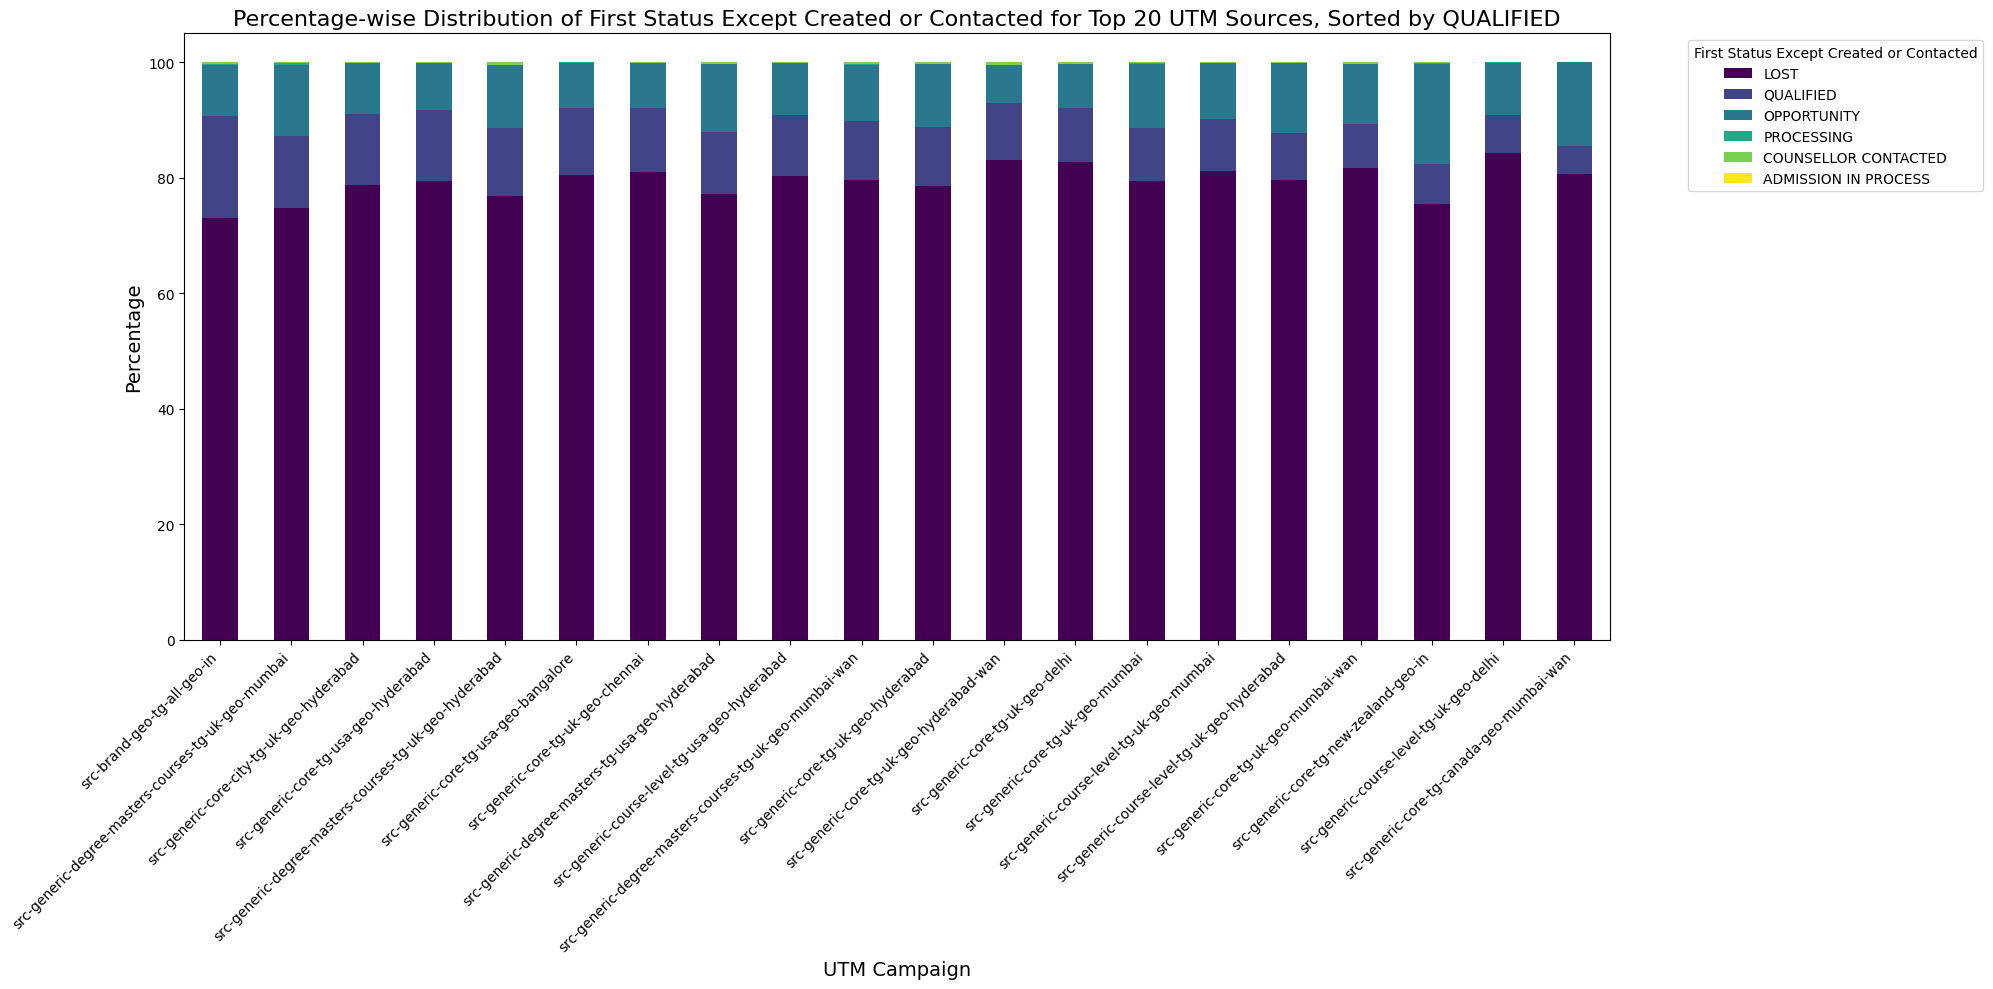

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming all previous steps have been correctly executed and df_new_lead is your DataFrame

# Calculate the percentage-wise distribution for 'first_status_except_created_or_contacted' within each utm_source again to ensure we're up to date
distribution = df_lead.groupby('utm_campaign')['first_status_except_created_or_contacted'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Get the top 20 utm_sources by their total count
utm_source_counts = df_lead['utm_campaign'].value_counts()
top_utm_sources = utm_source_counts.head(20).index

# Filter the distribution to only include these top 20 utm_sources
top_distribution = distribution.loc[top_utm_sources]

# BEFORE PLOTTING: Sort top_distribution by 'QUALIFIED', if it exists
if 'QUALIFIED' in top_distribution.columns:
    # Extract the 'QUALIFIED' column for sorting
    qualified_percentages = top_distribution['QUALIFIED'].copy()
    
    # Sort the top_utm_sources by 'QUALIFIED' in descending order
    sorted_top_utm_sources = qualified_percentages.sort_values(ascending=False).index
    
    # Re-order top_distribution using the sorted indices
    top_distribution = top_distribution.loc[sorted_top_utm_sources]

# Plotting with the sorted distribution
plt.figure(figsize=(20, 10))  # Adjust the size as necessary to fit all labels
top_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(20, 10))

# Enhancing the plot
plt.title('Percentage-wise Distribution of First Status Except Created or Contacted for Top 20 UTM Campaigns, Sorted by QUALIFIED', fontsize=16)
plt.xlabel('UTM Campaign', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility
plt.legend(title='First Status Except Created or Contacted', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

# Make sure everything is visible
plt.tight_layout()

# Show the plot
plt.show()


In [578]:
df_final_metric = pd.read_csv("/Users/ASL-USER/Documents/Uniacco/US Bookings/final_report_metrics.csv")

In [580]:
df_final_metric.head()

,Unnamed: 0,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,...,notes_violation,is_qualified,is_lost,earliest_note_date,earliest_task_date,Campaign Name,Campaign Type,Campaign Sub Category,.Campaign Country,Campaign Location
0,0,104364,01/03/23 0:13,LOST,Maria Bagdadi,NaN,LOST,11/03/23 8:36,unicreds,NaN,...,1,0,1,34:03.2,34:16.4,NaN,NaN,NaN,NaN,NaN
1,1,104396,01/03/23 1:06,LOST,Nipun Saigal,NaN,LOST,04/03/23 8:57,unicreds,NaN,...,0,0,1,20:00.7,22:26.3,NaN,NaN,NaN,NaN,NaN
2,2,104405,01/03/23 1:36,LOST,Nipun Saigal,NaN,LOST,04/03/23 8:58,google,NaN,...,0,0,1,35:18.3,35:45.3,src-generic-course-level-tg-uk-geo-hyderabad,Search,Course,UK,Hyderabad
3,3,104411,01/03/23 2:05,LOST,Dhruvi Kakadia,NaN,LOST,09/03/23 11:52,google,NaN,...,1,0,1,39:49.5,40:07.0,src-generic-course-level-tg-uk-geo-hyderabad-wan,Search,Course,UK,Hyderabad-Wan
4,4,104416,01/03/23 2:30,LOST,Diana Fernandes,NaN,OPPORTUNITY,08/03/23 14:19,google,NaN,...,1,0,1,55:11.3,55:20.1,src-generic-core-tg-uk-geo-mumbai,Search,Core,UK,Mumbai


In [582]:
import pandas as pd

# Assuming df_final_metrics is your dataframe

# Group the dataframe by 'Campaign Name'
grouped = df_final_metric.groupby('Campaign Name').agg(
    Total_Leads=('lead_id', 'count'),
    Leads_Qualified=('is_qualified', lambda x: (x==1).sum()),
    Lost_Leads=('is_lost', lambda x: (x==1).sum())
).reset_index()

# Rename the 'Campaign Name' column for clarity, if needed
grouped.rename(columns={'Campaign Name': 'Campaign_Name'}, inplace=True)


In [584]:
grouped.to_clipboard()

In [638]:
df_lead_f = df_lead[df_lead['time_diff_in_days'] < 0]

In [639]:
df_lead_f

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,free_time_sum_days_count,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date,note_date_diff,task_date_diff
6738,131874,2023-04-15 00:13:00,LOST,Dummy User,Chennai,LOST,2023-04-14 18:43:00,google,NaN,src-generic-degree-masters-courses-tg-australi...,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
6739,131884,2023-04-15 01:14:00,LOST,Dummy User,NaN,LOST,2023-04-14 19:44:00,google,NaN,src-generic-core-tg-usa-geo-hyderabad-wan,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
6978,134616,2023-04-20 00:56:00,LOST,Dummy User,NaN,LOST,2023-04-19 19:26:00,google,NaN,src-generic-course-level-tg-australia-geo-chen...,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
7013,135119,2023-04-21 01:57:00,LOST,Dummy User,NaN,LOST,2023-04-20 20:27:00,google,NaN,src-generic-course-level-tg-all-geo-mumbai,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
7678,135101,2023-04-21 00:38:00,LOST,Dummy User,NaN,LOST,2023-04-20 19:08:00,google,NaN,src-generic-course-level-tg-all-geo-mumbai,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145276,143252,2023-05-06 01:44:00,LOST,Dummy User,NaN,LOST,2023-05-05 20:14:00,google,NaN,src-generic-scholarship-tg-uk-geo-mumbai-wan,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
145301,144522,2023-05-07 00:02:00,LOST,Dummy User,NaN,LOST,2023-05-06 18:32:00,google,NaN,src-generic-core-tg-uk-geo-hyderabad,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
145472,152503,2023-05-17 03:06:00,LOST,Rutuja More,Delhi,LOST,2023-05-16 21:36:00,google,NaN,src-generic-core-tg-uk-geo-delhi,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN
145882,173698,2023-07-05 00:07:00,LOST,Dummy User,Delhi,LOST,2023-07-04 18:37:00,inf,NaN,instagram,...,0.0,-0.0,0,0.0,0,1,NaT,NaT,NaN,NaN


In [100]:
df_lead

,lead_id,lead_created_at,cur_status,lqt_agent,hybrid_branch,first_status_except_created_or_contacted,first_status_except_created_or_contacted_date,utm_source,qualified_date,utm_campaign,...,notes_to_time_diff_in_days_percentage,notes_violation,tasks_violation_percentage,is_qualified,is_lost,earliest_note_date,earliest_task_date,note_date_diff,task_date_diff,year_month
0,104361,2023-02-28 18:39:55.452732,LOST,Faraz Ebji,NaN,NaN,NaT,google,NaN,src-generic-core-city-tg-uk-geo-hyderabad,...,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN,2023-02
1,104374,2023-02-28 19:10:28.401481,LOST,Yash Choudhary,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN,2023-02
2,104385,2023-02-28 19:14:39.355228,LOST,Mufida Loladiya,NaN,NaN,NaT,unicreds,NaN,NaN,...,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN,2023-02
3,104386,2023-02-28 19:19:56.718098,LOST,Nipun Saigal,NaN,NaN,NaT,google,NaN,src-generic-core-tg-ireland-geo-hyderabad,...,NaN,0,0.0,0,1,NaT,NaT,NaN,NaN,2023-02
4,104456,2023-03-01 01:21:44.903798,LOST,Maria Bagdadi,NaN,LOST,2023-03-01 07:11:33.453268,google,NaN,src-generic-degree-masters-courses-tg-canada-g...,...,100.0,0,0.0,0,1,2023-03-01,NaT,0.0,NaN,2023-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149494,181261,2023-07-21 12:22:45.586146,DEPOSIT,Sharmishtha Chikhalkar,Mumbai - HO,QUALIFIED,2023-07-21 14:34:53.590722,google,2023-07-21T20:04:53.590722,src-generic-degree-masters-tg-uk-geo-mumbai,...,200.0,0,0.0,1,0,2023-07-21,2023-07-21,0.0,0.0,2023-07
149495,380522,2024-03-17 03:55:34.148745,CONTACTED,Hardik Kamdar,Mumbai - HO,NaN,NaT,google,NaN,dsp-remarketing-tg-all-geo-in,...,NaN,0,0.0,0,0,NaT,NaT,NaN,NaN,2024-03
149496,380423,2024-03-16 19:20:31.595955,LOST,Hardik Kamdar,Hyderabad,LOST,2024-03-20 10:40:57.331616,google,NaN,src-generic-core-tg-uk-geo-hyderabad-wan,...,0.0,0,0.0,0,1,NaT,NaT,NaN,NaN,2024-03
149497,379556,2024-03-15 09:12:43.098012,CONTACTED,Sara Solkar,Hyderabad,NaN,NaT,google,NaN,src-competitors-geo-tg-all-geo-in,...,NaN,0,0.0,0,0,NaT,NaT,NaN,NaN,2024-03


In [101]:
df_lead.to_excel("final_metrics.xlsx")